<a href="https://colab.research.google.com/github/imacrepo/quantum_anomalyDetection/blob/main/Classical/Testing_Datasets_with_PCA_and_KernelPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here is the implementation of PCA and KPCA using PyOD and Scikit-learn

# 01 PCA and KPCA


TODO:


```
References PCA,KPCA: 
1. 

DATASETS:
1.

Next DATASETS:
1. 

Questions:
1.
```



# 02 **Import Libraries**

In [ ]:
# Import the necessary libraries.
import pandas as pd
import numpy as np
from numpy import reshape
import os
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

!pip install pyod            # Install PyOD. The PyOD library provides several outlier detection methods that can be used
#!pip install --upgrade pyod  # or update if needed
from pyod.models.pca import PCA as PCA_PYOD
from pyod.models.kpca import KPCA as KPCA_PYOD

from sklearn.decomposition import PCA, KernelPCA
from sklearn.linear_model import LogisticRegression

from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, precision_recall_curve, classification_report, roc_curve, auc, roc_auc_score

from keras.datasets import mnist
from sklearn.datasets import load_iris, load_breast_cancer

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# For working in google_colab
from google.colab import drive
drive.mount('/content/drive')

# Add the folder to your google drive account to run it and change the directory path.
# You can also add Datasets to try it.
# LINK of Datasets: https://drive.google.com/drive/folders/12K1jIqNfU_yVOSdn_pqOX9kIVAgLRFPg?usp=sharing

Mounted at /content/drive


# 03 **Load Datasets**

In [ ]:
# Save all datasets
directory_path = "/content/drive/MyDrive/KPCA_PCA/datasets/"
dataset_ex = ['.csv', '.data', '.mat', '.xls' ]
datasets = [f for f in os.listdir(directory_path) if ( f.endswith('.data') or f.endswith('.csv') or f.endswith('.mat') or f.endswith('.xls')) and f not in dataset_ex]
datasets

['HTRU_2.csv',
 'lymphography.data',
 'musk.mat',
 'cardio.mat',
 'mnist.mat',
 'bupa.data',
 'badges.data',
 'vowel-context.data',
 'arrhythmia.data',
 'doccc.xls',
 'cancer.csv',
 'annthyroid_21feat_normalised.csv']

# 04 **Our Datasets**
Run only for one Dataset and then continue

## **A) Chosen Datasets**

### **Liver dataset**

https://archive.ics.uci.edu/ml/machine-learning-databases/liver-disorders/bupa.data

1. Title: BUPA liver disorders

2. Source information:

   -- Creators: BUPA Medical Research Ltd.

   -- Donor: Richard S. Forsyth 8 Grosvenor Avenue Mapperley Park Nottingham NG3 5DX, 0602-621676
   
   -- Date: 5/15/1990

3. Past usage: 
   -- None known other than what is shown in the PC/BEAGLE User's Guide
      (written by Richard S. Forsyth).

4. Relevant information:
   -- The first 5 variables are all blood tests which are thought
      to be sensitive to liver disorders that might arise from
      excessive alcohol consumption.  Each line in the bupa.data file
      constitutes the record of a single male individual.
   -- It appears that drinks>5 is some sort of a selector on this database.
      See the PC/BEAGLE User's Guide for more information.

5. Number of instances: 345

6. Number of attributes: 7 overall

7. Attribute information:
   1. mcv	mean corpuscular volume
   2. alkphos	alkaline phosphotase
   3. sgpt	alamine aminotransferase
   4. sgot 	aspartate aminotransferase
   5. gammagt	gamma-glutamyl transpeptidase
   6. drinks	number of half-pint equivalents of alcoholic beverages drunk per day
   7. selector  field used to split data into two sets

8. Missing values: none

1-5: blood, 6th -> gives the drinks  and if is drinks>5 then HIGH:1 if drinks<=5 then drinks LO:0. the 7th column gives the recommendes train and test data. We can try with random test and train data and we can try the recommended. WE HAVE TO REMOVE THE DOUBLE ENTRIES (clean data):

Thanks to Leon for mentioning that there are duplicates in this data set.
--UCI ML Librarian

row 84 and 86:   94,58,21,18,26,2.0,

row 141 and 318:   92,80,10,26,20,6.0,1

row 143 and 150:   91,63,25,26,15,6.0,1

row 170 and 176:   97,71,29,22,52,8.0,1


In [ ]:
dataset = datasets[5]
df = pd.read_csv(directory_path + dataset, header=None)
df

,0,1,2,3,4,5,6
0,85,92,45,27,31,0.0,1
1,85,64,59,32,23,0.0,2
2,86,54,33,16,54,0.0,2
3,91,78,34,24,36,0.0,2
4,87,70,12,28,10,0.0,2
...,...,...,...,...,...,...,...
340,99,75,26,24,41,12.0,1
341,96,69,53,43,203,12.0,2
342,98,77,55,35,89,15.0,1
343,91,68,27,26,14,16.0,1


In [ ]:
# Remove the duplicates
df = df.drop_duplicates(keep=False)
df = df.reset_index(drop=True)
df

,0,1,2,3,4,5,6
0,85,92,45,27,31,0.0,1
1,85,64,59,32,23,0.0,2
2,86,54,33,16,54,0.0,2
3,91,78,34,24,36,0.0,2
4,87,70,12,28,10,0.0,2
...,...,...,...,...,...,...,...
332,99,75,26,24,41,12.0,1
333,96,69,53,43,203,12.0,2
334,98,77,55,35,89,15.0,1
335,91,68,27,26,14,16.0,1


In [ ]:
df['target'] = df[5].apply(lambda x: 0  if x <= 5 else 1)
df

,0,1,2,3,4,5,6,target
0,85,92,45,27,31,0.0,1,0
1,85,64,59,32,23,0.0,2,0
2,86,54,33,16,54,0.0,2,0
3,91,78,34,24,36,0.0,2,0
4,87,70,12,28,10,0.0,2,0
...,...,...,...,...,...,...,...,...
332,99,75,26,24,41,12.0,1,1
333,96,69,53,43,203,12.0,2,1
334,98,77,55,35,89,15.0,1,1
335,91,68,27,26,14,16.0,1,1


In [ ]:
X = df.iloc[:, :-2].values
y = df.iloc[:, -1].values
X = scaler.fit_transform(X)
X

array([[-1.14165152,  1.19446094,  0.73232261,  0.2282718 , -0.19010742,
        -1.01980084],
       [-1.14165152, -0.31983886,  1.44544914,  0.72076602, -0.39228872,
        -1.01980084],
       [-0.91692222, -0.86066022,  0.12107129, -0.85521548,  0.39116382,
        -1.01980084],
       ...,
       [ 1.77982938,  0.3832289 ,  1.24169871,  1.01626255,  1.27570701,
         3.4706985 ],
       [ 0.20672428, -0.10351032, -0.18455437,  0.12977296, -0.61974268,
         3.77006512],
       [ 1.77982938,  1.57303589,  1.34357393,  2.00125099,  0.66916311,
         4.96753161]])

In [ ]:
df.columns

Index([0, 1, 2, 3, 4, 5, 6, 'target'], dtype='object')

In [ ]:
df['target']

0      0
1      0
2      0
3      0
4      0
      ..
332    1
333    1
334    1
335    1
336    1
Name: target, Length: 337, dtype: int64

In [ ]:
counts = df['target'].value_counts()

contamination = counts[1]/(counts[0] +counts[1])


print("\n0s: ",counts[0])
print("\n1s: ",counts[1])
print(contamination)

#contamination =   # percentage of outliers
n_features = 5              # number of features
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

X_train_pd = pd.DataFrame(X_train)
print(X_train_pd.head())

counts = y_train.sum()
contamination = counts/(len(df)+counts)


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(counts)
print(len(df))
print(contamination)


0s:  255

1s:  82
0.2433234421364985
          0         1         2         3         4         5
0 -1.815839 -0.428003 -0.693930 -0.756717 -0.594470 -0.870118
1 -0.692193 -0.049428 -0.439242  0.129773 -0.695561 -0.870118
2  1.330371  0.004654 -0.490180  0.129773 -0.442834  0.177666
3 -0.018005  0.166900 -0.337367 -0.165724 -0.695561 -0.870118
4 -0.242734 -0.373921 -0.439242  0.228272 -0.720833  0.177666
(235, 6)
(235,)
(102, 6)
(102,)
57
337
0.1446700507614213


The non-0s PCA components are:  6


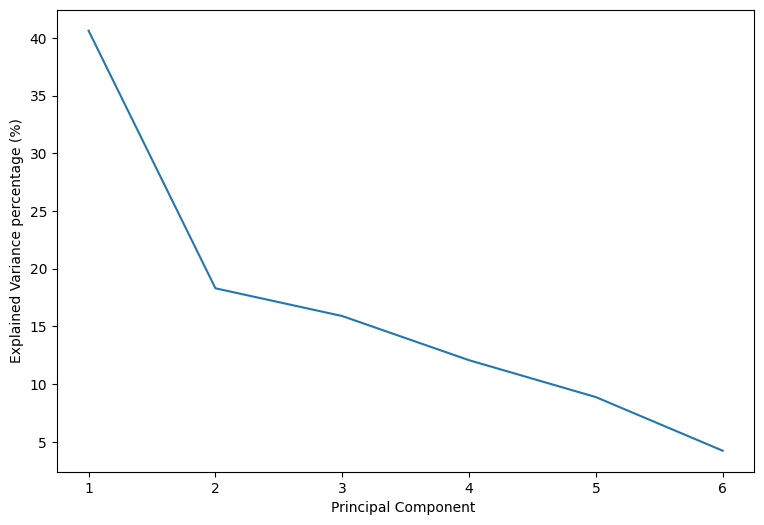

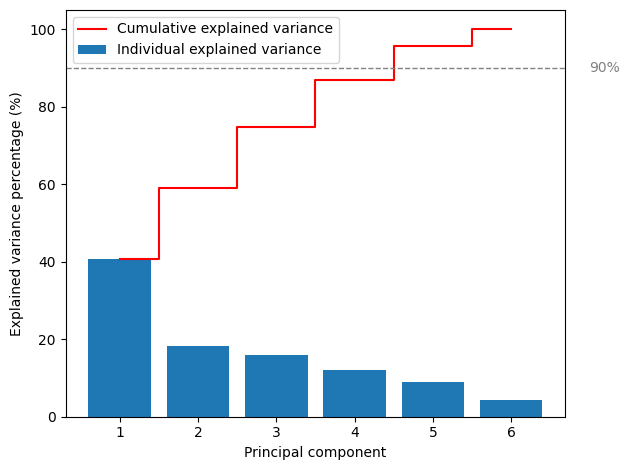

Number of principal components needed to explain 90% of variance: 5
The threshold of the PCA method for the given contamination rate: 102.7478536475477

Train set with the threshold:



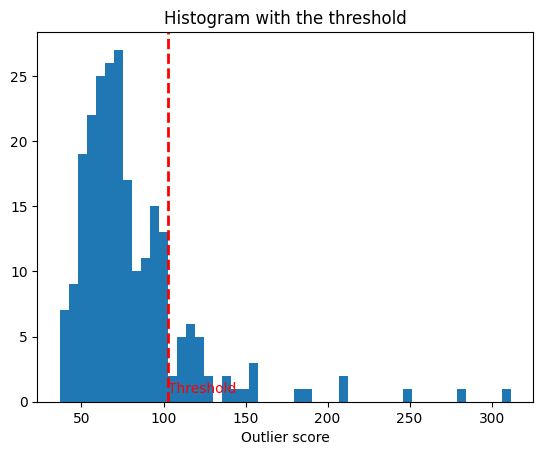




Test set with the threshold:



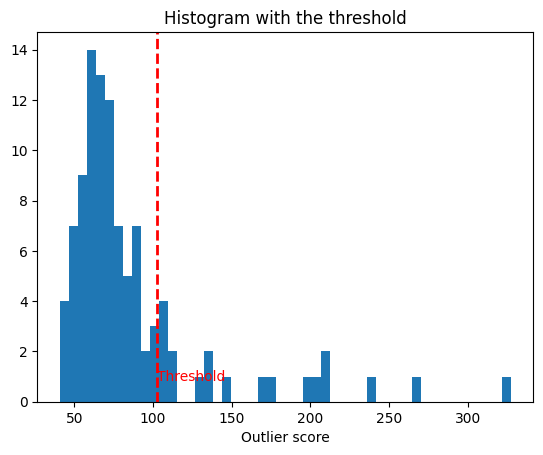



     Group  Count    Count %     0     1     2     3     4     5  \
0   Normal     82  80.392157 -0.13 -0.16 -0.20 -0.25 -0.21 -0.16   
1  Outlier     20  19.607843  0.29 -0.31  1.11  1.51  1.39  0.65   

   Anomaly_Score  
0          68.23  
1         164.88  


Accuracy:  0.7549019607843137
Precision:  0.5
Recall:  0.4
F1 Score:  0.4444444444444445

This is the AUC ROC:



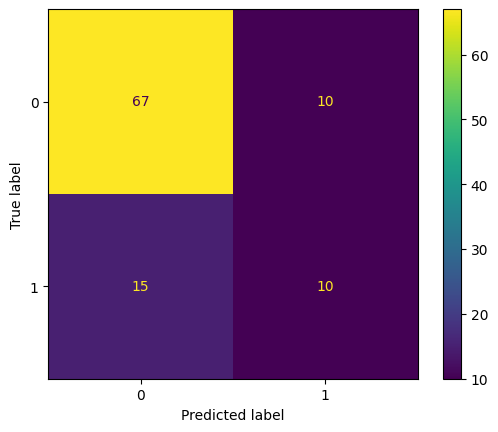

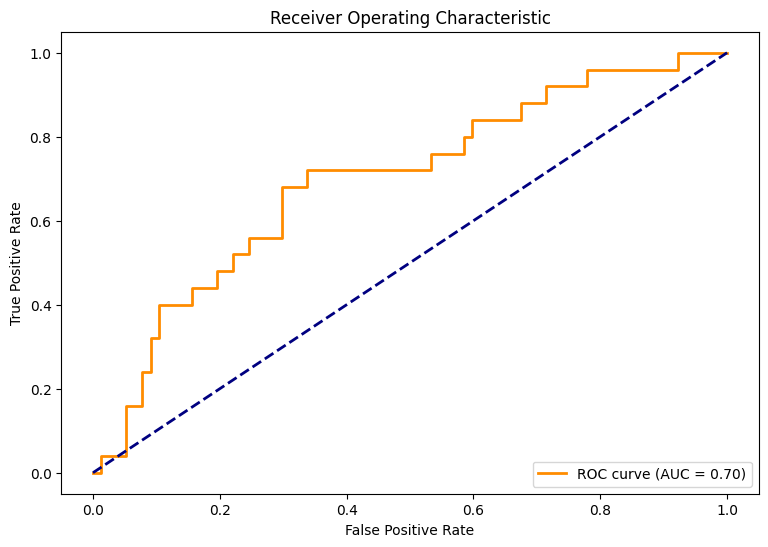



              precision    recall  f1-score   support

           0       0.82      0.87      0.84        77
           1       0.50      0.40      0.44        25

    accuracy                           0.75       102
   macro avg       0.66      0.64      0.64       102
weighted avg       0.74      0.75      0.75       102


For test data: ROC:0.6971, precision @ rank n:0.44
The threshold of the PCA method for the given contamination rate: 0.08150501277397827

Train set with the threshold:



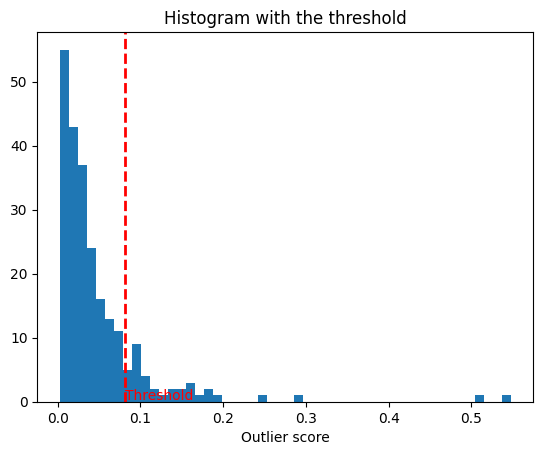




Test set with the threshold:



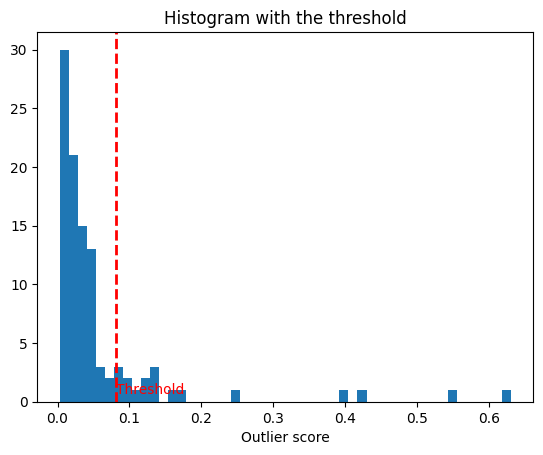



     Group  Count    Count %     0     1     2     3     4     5  \
0   Normal     84  82.352941 -0.04 -0.18 -0.20 -0.23 -0.16 -0.07   
1  Outlier     18  17.647059 -0.09 -0.23  1.24  1.61  1.32  0.33   

   Anomaly_Score  
0           0.03  
1           0.21  


Accuracy:  0.7156862745098039
Precision:  0.3888888888888889
Recall:  0.28
F1 Score:  0.32558139534883723

This is the AUC ROC:



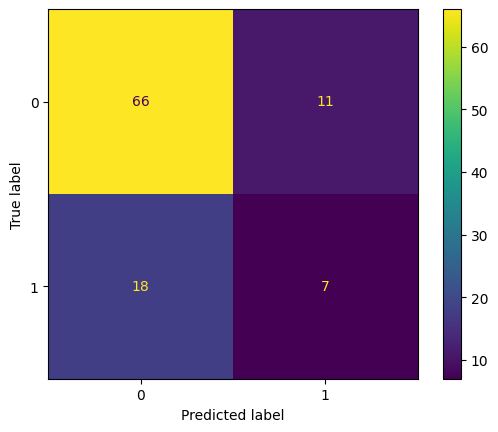

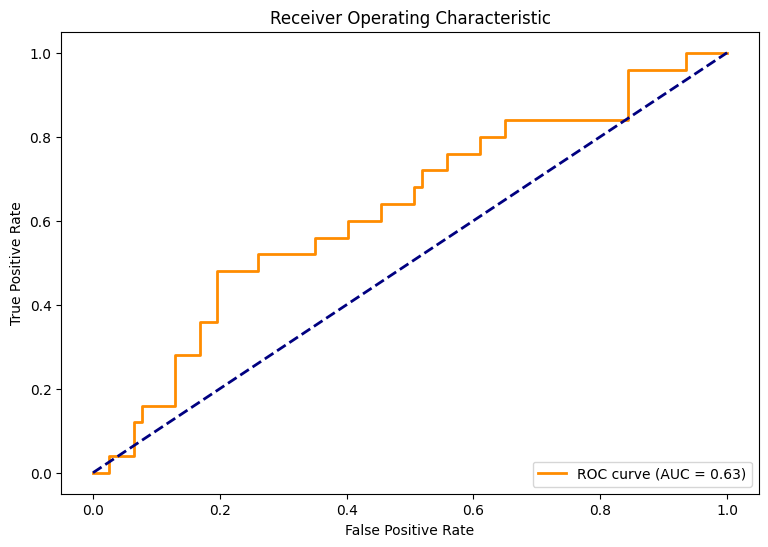



              precision    recall  f1-score   support

           0       0.79      0.86      0.82        77
           1       0.39      0.28      0.33        25

    accuracy                           0.72       102
   macro avg       0.59      0.57      0.57       102
weighted avg       0.69      0.72      0.70       102


For test data: ROC:0.627, precision @ rank n:0.4


In [ ]:
#OD
pca_kpca_with_metrics('pca', X_train, y_train, X_test, y_test, contamination=contamination)
pca_kpca_with_metrics('kpca', X_train, y_train, X_test, y_test, kernel='rbf', gamma=0.01, contamination=contamination)

### **Arrhythmia dataset**


https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data

Data Set Information:

This database contains 279 attributes, 206 of which are linear valued and the rest are nominal.

Concerning the study of H. Altay Guvenir: "The aim is to distinguish between the presence and absence of cardiac arrhythmia and to classify it in one of the 16 groups. Class 01 refers to 'normal' ECG classes 02 to 15 refers to different classes of arrhythmia and class 16 refers to the rest of unclassified ones. For the time being, there exists a computer program that makes such a classification. However there are differences between the cardiolog's and the programs classification. Taking the cardiolog's as a gold standard we aim to minimise this difference by means of machine learning tools."

The names and id numbers of the patients were recently removed from the database.



Attribute Information:

-- Complete attribute documentation:
1. Age: Age in years , linear
2. Sex: Sex (0 = male; 1 = female) , nominal
3. Height: Height in centimeters , linear
4. Weight: Weight in kilograms , linear
5. QRS duration: Average of QRS duration in msec., linear
6. P-R interval: Average duration between onset of P and Q waves in msec., linear
7. Q-T interval: Average duration between onset of Q and offset of T waves in msec., linear
8. T interval: Average duration of T wave in msec., linear
9. P interval: Average duration of P wave in msec., linear
Vector angles in degrees on front plane of:, linear
10. QRS
11. T
12. P
13. QRST
14. J

15. Heart rate: Number of heart beats per minute ,linear
Of channel DI:
Average width, in msec., of: linear
16 Q wave
17 R wave
18 S wave
19 R' wave, small peak just after R
20 S' wave

21 Number of intrinsic deflections, linear

22 Existence of ragged R wave, nominal
23 Existence of diphasic derivation of R wave, nominal
24 Existence of ragged P wave, nominal
25 Existence of diphasic derivation of P wave, nominal
26 Existence of ragged T wave, nominal
27 Existence of diphasic derivation of T wave, nominal

Of channel DII:
28 .. 39 (similar to 16 .. 27 of channel DI)
Of channels DIII:
40 .. 51
Of channel AVR:
52 .. 63
Of channel AVL:
64 .. 75
Of channel AVF:
76 .. 87
Of channel V1:
88 .. 99
Of channel V2:
100 .. 111
Of channel V3:
112 .. 123
Of channel V4:
124 .. 135
Of channel V5:
136 .. 147
Of channel V6:
148 .. 159

Of channel DI:
Amplitude , * 0.1 milivolt, of
160 JJ wave, linear
161 Q wave, linear
162 R wave, linear
163 S wave, linear
164 R' wave, linear
165 S' wave, linear
166 P wave, linear
167 T wave, linear

168 QRSA , Sum of areas of all segments divided by 10, ( Area= width * height / 2 ), linear
169 QRSTA = QRSA + 0.5 * width of T wave * 0.1 * height of T wave. (If T is diphasic then the bigger segment is considered), linear

Of channel DII:
170 .. 179
Of channel DIII:
180 .. 189
Of channel AVR:
190 .. 199
Of channel AVL:
200 .. 209
Of channel AVF:
210 .. 219
Of channel V1:
220 .. 229
Of channel V2:
230 .. 239
Of channel V3:
240 .. 249
Of channel V4:
250 .. 259
Of channel V5:
260 .. 269
Of channel V6:
270 .. 279



In [ ]:
dataset = datasets[8]
df = pd.read_csv(directory_path + dataset, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [ ]:
# Missing Attribute Values: Several.  Distinguished with '?'
df.replace({col: {'?': np.nan} for col in df}, inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [ ]:
# Count the number of NaN values in each row
nan_rows = df.isnull().any(axis=1).sum()
print("Number of rows with NaN values:", nan_rows)

# Count the number of NaN values in each column
nan_columns = df.isnull().any(axis=0).sum()
print("Number of columns with NaN values:", nan_columns)

Number of rows with NaN values: 384
Number of columns with NaN values: 5


In [ ]:
#We will remove the columns
df = df.dropna(axis=1)
print("The new shape of the dataset is:", df.shape)
print("Number of rows with NaN values:", df.isnull().any(axis=1).sum())
print("Number of columns with NaN values:", df.isnull().any(axis=0).sum())
df.head()

The new shape of the dataset is: (452, 275)
Number of rows with NaN values: 0
Number of columns with NaN values: 0


,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7



```
# Class code :   Class :     Number of instances:
       01             Normal  245
       02             Ischemic changes (Coronary Artery Disease)  44
       03             Old Anterior Myocardial Infarction  15
       04             Old Inferior Myocardial Infarction  15
       05             Sinus tachycardy  13
       06             Sinus bradycardy  25
       07             Ventricular Premature Contraction (PVC) 3
       08             Supraventricular Premature Contraction  2
       09             Left bundle branch block  9	
       10             Right bundle branch block 50
       11             1. degree AtrioVentricular  0	
       12             2. degree AV block  0
       13             3. degree AV block  0
       14             Left ventricule hypertrophy 4
       15             Atrial Fibrillation or Flutter  5
       16             Others  22
```



In [ ]:
df['target'] = df[279].apply(lambda x:0 if x==1 else 1)
df.head()

<ipython-input-128-aac6570e8729>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = df[279].apply(lambda x:0 if x==1 else 1)


,0,1,2,3,4,5,6,7,8,9,...,271,272,273,274,275,276,277,278,279,target
0,75,0,190,80,91,193,371,174,121,-16,...,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8,1
1,56,1,165,64,81,174,401,149,39,25,...,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6,1
2,54,0,172,95,138,163,386,185,102,96,...,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10,1
3,55,0,175,94,100,202,380,179,143,28,...,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1,0
4,75,0,190,80,88,181,360,177,103,-16,...,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7,1


In [ ]:
X = df.iloc[:, :-2].values
X = scaler.fit_transform(X)
y = df.iloc[:, -1].values
print(X)
print(y)

[[ 1.73443926 -1.1075202   0.64132669 ...  1.17773685  0.29460309
   1.07867028]
 [ 0.57931213  0.90291807 -0.03199781 ...  0.61612582  0.0796127
   0.50487408]
 [ 0.4577198  -1.1075202   0.15653305 ...  1.52874375 -0.52087767
   1.0570176 ]
 ...
 [-0.63661117 -1.1075202  -0.00506483 ... -0.15608935 -4.7094834
  -3.3926096 ]
 [-0.87979583  0.90291807 -0.30132761 ...  0.82672996  0.42063193
   0.92710147]
 [ 1.91682776  0.90291807 -0.16666271 ...  0.26511892  0.14633386
   0.18008377]]
[1 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 0 0
 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0
 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 0
 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 1
 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1

In [ ]:
counts = df['target'].value_counts()
contamination = counts[1]/(counts[0] +counts[1])
contamination # percentage of outliers

0.4579646017699115

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)
X_train_pd = pd.DataFrame(X_train)
X_train_pd.head()

,0,1,2,3,4,5,6,7,8,9,...,264,265,266,267,268,269,270,271,272,273
0,-0.393427,-1.107520,0.156533,-0.493009,-0.125126,-0.204334,-0.456032,-0.279520,-0.038934,1.042790,...,0.335776,0.508843,0.649172,0.728573,-0.079546,0.0,0.821490,0.054515,1.414036,0.986646
1,1.552051,0.902918,-0.031998,-0.010279,0.265820,0.487744,-0.426045,-0.869513,0.309929,0.469865,...,-0.161833,0.508843,1.196878,0.178631,-0.079546,0.0,0.821490,0.545924,1.139738,1.019125
2,0.214535,0.902918,0.021868,-0.070621,0.005190,-0.561535,0.473546,-0.391899,-0.659136,1.130932,...,-0.327703,-0.585512,0.505039,-0.121337,-0.079546,0.0,0.821490,-0.226291,0.057372,-0.236730
3,0.822497,0.902918,-0.166663,-0.432667,-0.516072,0.800295,-0.396059,-1.206652,0.348692,0.932612,...,0.667516,0.508843,-0.388585,0.728573,-0.079546,0.0,0.533427,-0.366693,0.161161,-0.085162
4,-1.001388,0.902918,-0.220529,-0.674032,-1.037333,-0.405260,0.053737,-0.757133,-0.504085,-0.081025,...,-0.493573,0.508843,0.130294,0.728573,-0.079546,0.0,-0.330763,-0.507096,0.257536,-0.188012


### **Vowel dataset_NotSure**

https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/vowel/vowel-context.data

    Introduction:
    In my work on context-sensitive learning, I used the "Deterding Vowel
    Recognition Data", but I found it necessary to reformulate the data.
    Implicit in the original data is contextual information on the
    speaker's gender and identity. For my work, it was necessary to make
    this information explicit. The file "vowel-context.data" adds the
    speaker's sex and identity as new features. The format of the data file
    is described below.

    Peter Turney
    peter@ai.iit.nrc.ca

    References:
    P. Turney. "Robust Classification With Context-Sensitive Features."
    Proceedings of the Sixth International Conference on Industrial
    and Engineering Applications of Artificial Intelligence and Expert
    Systems (IEA/AIE-93): 268-276. 1993.
    URL: ftp://ai.iit.nrc.ca/pub/ksl-papers/NRC-35074.ps.Z

    P. Turney. "Exploiting Context When Learning to Classify."
    Proceedings of the European Conference on Machine Learning
    (ECML-93): 402-407. 1993.
    URL: ftp://ai.iit.nrc.ca/pub/ksl-papers/NRC-35058.ps.Z



In [ ]:
datasets

['HTRU_2.csv',
 'lymphography.data',
 'musk.mat',
 'cardio.mat',
 'mnist.mat',
 'bupa.data',
 'badges.data',
 'vowel-context.data',
 'arrhythmia.data',
 'doccc.xls',
 'cancer.csv']

In [ ]:
dataset = datasets[7]
sep_regex = '\s{1,2}' # Because the data file has ' ' and '  ' between each column

#atasetorig = 'vowel.tr-orig-order'
#sep_regex = ','

df = pd.read_csv(directory_path + dataset, sep=sep_regex, header=None)
df

<ipython-input-578-5aa08d700bf7>:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(directory_path + dataset, sep=sep_regex, header=None)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0,0,0,-3.639,0.418,-0.670,1.779,-0.168,1.627,-0.388,0.529,-0.874,-0.814,0
1,0,0,0,-3.327,0.496,-0.694,1.365,-0.265,1.933,-0.363,0.510,-0.621,-0.488,1
2,0,0,0,-2.120,0.894,-1.576,0.147,-0.707,1.559,-0.579,0.676,-0.809,-0.049,2
3,0,0,0,-2.287,1.809,-1.498,1.012,-1.053,1.060,-0.567,0.235,-0.091,-0.795,3
4,0,0,0,-2.598,1.938,-0.846,1.062,-1.633,0.764,0.394,-0.150,0.277,-0.396,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,1,14,1,-3.239,3.083,-1.427,-0.202,-0.282,1.421,0.576,0.068,-0.914,0.147,6
986,1,14,1,-3.753,3.605,-0.899,-0.747,-0.401,1.765,0.620,0.754,-0.835,-0.301,7
987,1,14,1,-3.980,2.459,0.068,0.023,0.237,1.029,-0.189,0.521,-0.773,-0.500,8
988,1,14,1,-4.264,2.925,0.065,0.794,0.323,0.515,-1.282,-0.140,-0.863,-0.390,9


In [ ]:
# Count the number of NaN values in each row
nan_rows = df.isnull().any(axis=1).sum()
print("Number of rows with NaN values:", nan_rows)

# Count the number of NaN values in each column
nan_columns = df.isnull().any(axis=0).sum()
print("Number of columns with NaN values:", nan_columns)

Number of rows with NaN values: 0
Number of columns with NaN values: 0


	Column	|	Description
	-------------------------------
	00		Train or Test
	01		Speaker Number
	02		Sex
	03		Feature 0
	04		Feature 1
	05		Feature 2
	06		Feature 3
	07		Feature 4
	08		Feature 5
	09		Feature 6
	10		Feature 7
	11		Feature 8
	12		Feature 9
	13		Class

  if we have cap => 0 else 1 
  
    Classes: Number: Binary:
	hid		0		  1
	hId		1  		0
	hEd		2  		0
	hAd		3  		0
	hYd		4  		0
	had		5  		1
	hOd		6  		0
	hod		7  		1
	hUd		8  		0		 
	hud		9  		1
	hed		10 		1



In [ ]:
df['target'] = df.iloc[:, 13].replace({0: 1, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 0, 7: 1, 8: 0, 9: 1, 10: 1})
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,target
0,0,0,0,-3.639,0.418,-0.670,1.779,-0.168,1.627,-0.388,0.529,-0.874,-0.814,0,1
1,0,0,0,-3.327,0.496,-0.694,1.365,-0.265,1.933,-0.363,0.510,-0.621,-0.488,1,0
2,0,0,0,-2.120,0.894,-1.576,0.147,-0.707,1.559,-0.579,0.676,-0.809,-0.049,2,0
3,0,0,0,-2.287,1.809,-1.498,1.012,-1.053,1.060,-0.567,0.235,-0.091,-0.795,3,0
4,0,0,0,-2.598,1.938,-0.846,1.062,-1.633,0.764,0.394,-0.150,0.277,-0.396,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,1,14,1,-3.239,3.083,-1.427,-0.202,-0.282,1.421,0.576,0.068,-0.914,0.147,6,0
986,1,14,1,-3.753,3.605,-0.899,-0.747,-0.401,1.765,0.620,0.754,-0.835,-0.301,7,1
987,1,14,1,-3.980,2.459,0.068,0.023,0.237,1.029,-0.189,0.521,-0.773,-0.500,8,0
988,1,14,1,-4.264,2.925,0.065,0.794,0.323,0.515,-1.282,-0.140,-0.863,-0.390,9,1


	Set	|	Number
	-------------------
	Train		0
	Test		 1


In [ ]:
# fit and transform the selected columns
cols_to_scale = df.columns[3:13]
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# split the data into train and test sets
train_set = df[df[0] == 0]
test_set = df[df[0] == 1]

# separate the features (X) from the targets (y)
X_train = train_set.iloc[:, 3:13].values
y_train = train_set.iloc[:, 14].values
X_test = test_set.iloc[:, 3:13].values
y_test = test_set.iloc[:, 14].values

In [ ]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[-0.50113464 -1.24609747 -0.22798328 ...  0.3358522  -1.00201915
  -1.23022154]
 [-0.14191451 -1.17969631 -0.26171064 ...  0.30269411 -0.55806104
  -0.69020068]
 [ 1.24776079 -0.84088014 -1.50119087 ...  0.59239116 -0.88795876
   0.03700533]
 ...
 [-1.66629737  2.01266713 -0.44299516 ... -0.42329368 -1.82500869
   0.42462767]
 [-2.1072631   2.64858592 -1.58129334 ... -1.47388178  0.03505296
   0.62175185]
 [-1.21727221 -0.04662011  0.03621432 ... -0.50008085  0.33511951
   0.64991245]]
[[ 2.36571831 -2.37151199 -2.08017711 ...  1.4998759   0.00522179
  -0.65541406]
 [ 0.68014694 -1.6802589  -0.04529345 ... -0.13883212 -0.12638635
  -0.88235534]
 [ 0.80449236 -1.06391993 -0.11977469 ... -0.27146451 -0.10532905
  -1.14739626]
 ...
 [-0.89374382  0.49139954  0.80913284 ...  0.3218909  -0.82478686
  -0.71007875]
 [-1.22072625  0.8881039   0.80491692 ... -0.83166181 -0.98271662
  -0.52786312]
 [-0.10046604  0.37647445 -0.24063104 ... -0.38664526 -1.30384047
   1.2727586 ]]
[1 0 0 0 0 1 0 1

In [ ]:
counts = df['target'].value_counts()
contamination = counts[1]/(counts[0] +counts[1])
print('percentage of outliers:',contamination)

X_train_pd = pd.DataFrame(X_train)
X_train_pd.head()

percentage of outliers: 0.45454545454545453


,0,1,2,3,4,5,6,7,8,9
0,-0.501135,-1.246097,-0.227983,1.664981,0.207232,1.651444,-0.830931,0.335852,-1.002019,-1.230222
1,-0.141915,-1.179696,-0.261711,1.119439,0.061207,2.158431,-0.776782,0.302694,-0.558061,-0.690201
2,1.247761,-0.840880,-1.501191,-0.485563,-0.604189,1.538780,-1.244625,0.592391,-0.887959,0.037005
3,1.055486,-0.061943,-1.391577,0.654278,-1.125064,0.712027,-1.218634,-0.177226,0.371970,-1.198748
4,0.697417,0.047874,-0.475317,0.720165,-1.998208,0.221609,0.862834,-0.849113,1.017727,-0.537802


### **Iris dataset**
Is not one class

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target
X = scaler.fit_transform(X)

In [ ]:
X

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [ ]:
iris.target[iris.target == 2] = 0
#iris.target[iris.target == 2] = 0
#iris.target[iris.target == 2] = 1
y = iris.target
print(y)
y_series = pd.Series(y)
counts = y_series.value_counts()
contamination = counts[1]/(counts[0] + counts[1])  # percentage of outliers
print("The percentage of outliers: ", contamination)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

X_train_pd = pd.DataFrame(X_train)
X_train_pd.head()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
The percentage of outliers:  0.3333333333333333


,0,1,2,3
0,-0.900681,1.709595,-1.226552,-1.315444
1,-0.900681,1.709595,-1.283389,-1.183812
2,-0.900681,1.019004,-1.340227,-1.315444
3,-1.021849,-1.743357,-0.260315,-0.262387
4,-1.021849,-0.131979,-1.226552,-1.315444


### **Breast Cancer_sklearn**

In [ ]:
dataset = load_breast_cancer()
dataset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
target = dataset.target
contamination = sum(target) / len(target)
print("Contamination is:", contamination)
X = dataset.data
X = scaler.fit_transform(X)
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Contamination is: 0.6274165202108963


In [ ]:
target
contamination=0.5

In [ ]:
X.shape

(569, 30)

In [ ]:
y.shape

(569,)

## **B) Extra:**

### **EXTRA HTRU2 dataset**



17,898 total examples.
1,639 positive examples. as outliers
16,259 negative examples. as inliers

1. Mean of the integrated profile.
2. Standard deviation of the integrated profile.
3. Excess kurtosis of the integrated profile.
4. Skewness of the integrated profile.
5. Mean of the DM-SNR curve.
6. Standard deviation of the DM-SNR curve.
7. Excess kurtosis of the DM-SNR curve.
8. Skewness of the DM-SNR curve.
9. Class

In [ ]:
dataset = datasets[0]
df = pd.read_csv(directory_path + dataset, header=None)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X = scaler.fit_transform(X)

In [ ]:
counts = df[8].value_counts()
contamination = counts[1]/(counts[0] + counts[1])  # percentage of outliers
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

X_train_pd = pd.DataFrame(X_train)
X_train_pd.head()

,0,1,2,3,4,5,6,7
0,0.062971,1.162648,-0.171862,-0.348320,-0.386677,-0.676617,0.955283,0.715130
1,-0.773031,-0.710930,0.015077,-0.124191,-0.238614,-0.091203,-0.782211,-0.752064
2,-0.364015,-0.279495,-0.157062,-0.191103,-0.333228,-0.421810,0.119655,-0.140943
3,1.634777,-0.235911,-0.733803,-0.225069,-0.346732,-0.565516,0.189013,0.020776
4,-1.362344,-0.935907,0.370858,0.047962,-0.379840,-0.520631,0.826682,0.414455


### **EXTRA Lymphography dataset**


Data Set Information:

This is one of three domains provided by the Oncology Institute that has repeatedly appeared in the machine learning literature. (See also breast-cancer and primary-tumor.)


Attribute Information:

--- NOTE: All attribute values in the database have been entered as numeric values corresponding to their index in the list of attribute values for that attribute domain as given below.
1. class: normal find, metastases, malign lymph, fibrosis
2. lymphatics: normal, arched, deformed, displaced
3. block of affere: no, yes
4. bl. of lymph. c: no, yes
5. bl. of lymph. s: no, yes
6. by pass: no, yes
7. extravasates: no, yes
8. regeneration of: no, yes
9. early uptake in: no, yes
10. lym.nodes dimin: 0-3
11. lym.nodes enlar: 1-4
12. changes in lym.: bean, oval, round
13. defect in node: no, lacunar, lac. marginal, lac. central
14. changes in node: no, lacunar, lac. margin, lac. central
15. changes in stru: no, grainy, drop-like, coarse, diluted, reticular, stripped, faint,
16. special forms: no, chalices, vesicles
17. dislocation of: no, yes
18. exclusion of no: no, yes
19. no. of nodes in: 0-9, 10-19, 20-29, 30-39, 40-49, 50-59, 60-69, >=70

Class Distribution:
Class:        Number of Instances:

    1. normal find:  2
    2. metastases:   81
    3. malign lymph: 61
    4. fibrosis:     4
The original lymphography dataset from UCI machine learning repository is a classification dataset. It is a multi-class dataset having four classes, but two of them are quite small (2 and 4 data records). Therefore, those two small classes are merged and considered as outliers compared to other two large classes (81 and 61 data records).

In [ ]:
dataset = datasets[1]
df = pd.read_csv(directory_path + dataset, header=None)
X = df.iloc[:, 1:].values
X = scaler.fit_transform(X)

df['target'] = df.iloc[:, 0].replace({4: 1, 1: 1, 3: 0, 2: 0})
y = df.iloc[:, -1].values

counts = df['target'].value_counts()
contamination = counts[1]/(counts[0] +counts[1])  # percentage of outliers
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

### **EXTRA Musk dataset**


Dataset information:

The original musk dataset from UCI machine learning repository contains several musk and non-musk classes. The non-musk classes j146, j147, and 252 are combined to form the inliers, while the musk classes 213 and 211 are added as outliers without downsampling. Other classes are discarded. 

In [ ]:
dataset = datasets[3]
data = loadmat(directory_path + dataset)
df = pd.DataFrame(data['X'])
df['target'] = data['y']

In [ ]:
data['X'].shape

(1831, 21)

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X = scaler.fit_transform(X)

counts = df['target'].value_counts()
contamination = counts[1]/(counts[0] +counts[1])  # percentage of outliers

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)
X_train_pd = pd.DataFrame(X_train)
X_train_pd.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.639989,-0.920240,-0.203696,-0.359548,-0.683785,-0.061417,-0.278371,-0.334376,-0.746689,0.201971,...,-1.347365,1.447146,-0.565488,-0.753601,-0.488412,0.361679,0.512494,0.438519,-0.657369,-0.493429
1,1.169219,-0.386622,0.886311,-1.267294,2.059859,-0.061417,-0.278371,1.161670,2.728624,-0.420602,...,1.830666,-0.834241,2.515431,1.999203,2.415104,0.542075,-1.403472,0.852436,0.946285,-0.493429
2,0.957527,0.046391,-0.203696,-1.636318,-0.683785,-0.061417,-0.278371,0.024675,-0.399158,-0.420602,...,0.691871,-0.727301,0.314774,-1.097701,-0.488412,1.023131,1.151149,1.059394,-0.456912,1.140329
3,0.639989,2.638048,-0.203696,0.414298,-0.683785,-0.061417,-0.278371,0.383726,-0.630846,-0.420602,...,-0.658792,1.126326,0.369791,-0.753601,-0.488412,0.662339,1.023418,0.852436,-0.523731,-0.493429
4,-0.736008,-0.443454,-0.203696,0.012292,-0.683785,-0.061417,-0.278371,-0.274534,-0.862533,0.139713,...,-1.188464,1.126326,-0.730538,-1.097701,-0.488412,-0.299773,-0.062296,-0.320328,-0.623959,-2.127186


### **EXTRA MNIST dataset**

In [ ]:
dataset = datasets[4]
data = loadmat(directory_path + dataset)
df = pd.DataFrame(data['X'])
df['target'] = data['y']
df

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,target
0,-0.0036,-73.804153,198.205963,0.0,-13.124617,-1.1501,0.0,-0.141633,179.249390,114.661163,...,-0.107667,-4.469967,158.381409,-137.100632,27.131416,-2.274633,-0.00065,-12.351267,0.0,0
1,-0.0036,-73.804153,197.205963,0.0,-13.124617,-1.1501,0.0,-0.141633,179.249390,-44.338833,...,-0.107667,-4.469967,123.381416,-137.100632,157.131409,-2.274633,-0.00065,-12.351267,0.0,0
2,-0.0036,-73.804153,-53.794033,0.0,-13.124617,-1.1501,0.0,-0.141633,-73.750618,-44.338833,...,-0.107667,-4.469967,157.381409,-137.100632,-93.868584,-2.274633,-0.00065,-12.351267,0.0,0
3,-0.0036,-73.804153,86.205963,0.0,-13.124617,-1.1501,0.0,-0.141633,76.249382,208.661163,...,-0.107667,-4.469967,157.381409,-137.100632,74.131416,-2.274633,-0.00065,-12.351267,0.0,0
4,-0.0036,-27.804153,199.205963,0.0,-13.124617,-1.1501,0.0,-0.141633,179.249390,-44.338833,...,-0.107667,-4.469967,22.381416,-137.100632,159.131409,-2.274633,-0.00065,-12.351267,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7598,-0.0036,179.195847,0.205967,0.0,-13.124617,-1.1501,0.0,-0.141633,179.249390,-44.338833,...,-0.107667,-4.469967,159.381409,115.899368,-93.868584,-2.274633,-0.00065,-12.351267,0.0,1
7599,-0.0036,-73.804153,-53.794033,0.0,29.875383,-1.1501,0.0,-0.141633,-73.750618,67.661163,...,-0.107667,-4.469967,-93.618584,94.899368,-93.868584,-2.274633,-0.00065,-12.351267,0.0,1
7600,-0.0036,-73.804153,-53.794033,0.0,-13.124617,-1.1501,0.0,-0.141633,-73.750618,-44.338833,...,-0.107667,-4.469967,-93.618584,-137.100632,-53.868584,-2.274633,-0.00065,-12.351267,0.0,1
7601,-0.0036,-73.804153,-53.794033,0.0,19.875383,-1.1501,0.0,-0.141633,153.249390,-44.338833,...,-0.107667,-4.469967,158.381409,23.899368,-93.868584,-2.274633,-0.00065,125.648735,0.0,1


In [ ]:
data['X'].shape

(7603, 100)

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X = scaler.fit_transform(X)

counts = df['target'].value_counts()
contamination = counts[1]/(counts[0] + counts[1])  # percentage of outliers
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

X_train_pd = pd.DataFrame(X_train)
X_train_pd.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.0,-0.667510,0.958133,0.0,-0.208549,-0.063490,0.0,-0.026254,-1.543515,0.533873,...,0.002568,0.0,4.408915,0.819529,-0.309656,-0.587901,-0.089334,-0.011469,2.419760,0.0
1,0.0,0.125665,0.967269,0.0,-0.208549,-0.063490,0.0,-0.026254,0.568647,-0.695434,...,1.049487,0.0,-0.311593,-1.405250,-0.309656,2.258400,-0.089334,-0.011469,-0.270945,0.0
2,0.0,-0.163611,0.327786,0.0,-0.208549,-0.063490,0.0,-0.026254,-0.658690,-0.601674,...,1.040383,0.0,-0.311593,0.940542,-0.309656,-0.587901,-0.089334,-0.011469,-0.540015,0.0
3,0.0,-0.919459,0.958133,0.0,-0.208549,8.868944,0.0,-0.026254,0.863589,-0.695434,...,-1.262837,0.0,-0.311593,0.949851,-0.309656,-0.587901,-0.089334,-0.011469,-0.540015,0.0
4,0.0,1.441402,0.958133,0.0,-0.208549,-0.063490,0.0,-0.026254,0.863589,-0.695434,...,1.040383,0.0,-0.311593,-1.405250,-0.309656,-0.587901,-0.089334,-0.011469,2.010305,0.0


### **EXTRA Default of credit card clients Data Set**

**Data Set Information**:

This research aimed at the case of customersâ€™ default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel â€œSorting Smoothing Methodâ€ to estimate the real probability of default. With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial neural network is the only one that can accurately estimate the real probability of default.

**Attribute Information**:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
X2: Gender (1 = male; 2 = female).
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
X4: Marital status (1 = married; 2 = single; 3 = others).
X5: Age (year).
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [ ]:
dataset = datasets[9]
print(dataset)
df = pd.read_excel(directory_path + dataset, header=None) 
df

doccc.xls


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,NaN,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
2,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
3,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
4,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29997,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29998,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29999,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
30000,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [ ]:
df = df.iloc[2:, 1:].reset_index(drop=True)
df.columns = range(df.shape[1])
df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [ ]:
# Count the number of NaN values in each row
nan_rows = df.isnull().any(axis=1).sum()
print("Number of rows with NaN values:", nan_rows)

# Count the number of NaN values in each column
nan_columns = df.isnull().any(axis=0).sum()
print("Number of columns with NaN values:", nan_columns)

Number of rows with NaN values: 0
Number of columns with NaN values: 0


In [ ]:
X = df.iloc[:, :-1].values
X = scaler.fit_transform(X)
y = df.iloc[:, -1].values
print(X)
print(y)

[[-1.13672015  0.81016074  0.18582826 ... -0.30806256 -0.31413612
  -0.29338206]
 [-0.3659805   0.81016074  0.18582826 ... -0.24422965 -0.31413612
  -0.18087821]
 [-0.59720239  0.81016074  0.18582826 ... -0.24422965 -0.24868274
  -0.01212243]
 ...
 [-1.05964618 -1.23432296  0.18582826 ... -0.03996431 -0.18322937
  -0.11900109]
 [-0.67427636 -1.23432296  1.45111372 ... -0.18512036  3.15253642
  -0.19190359]
 [-0.90549825 -1.23432296  0.18582826 ... -0.24422965 -0.24868274
  -0.23713013]]
[1 1 0 ... 1 1 1]


In [ ]:
counts = df[23].value_counts()
contamination = counts[1]/(counts[0] +counts[1])
contamination # percentage of outliers

0.2212

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)
X_train_pd = pd.DataFrame(X_train)
X_train_pd.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-0.057685,0.810161,0.185828,0.858557,-0.378129,0.014861,0.111736,0.138865,0.188746,0.234917,...,1.562994,1.709436,1.914918,1.963730,0.020312,0.003422,0.021260,0.074935,0.078584,0.016004
1,-0.520128,0.810161,-1.079457,0.858557,-0.595102,0.014861,0.111736,0.138865,0.188746,1.999879,...,-0.068209,0.128646,0.168951,0.230319,-0.040064,0.177029,0.271165,-0.308063,-0.127856,-0.184478
2,-0.674276,-1.234323,-1.079457,0.858557,-0.703588,0.014861,0.111736,0.138865,0.188746,0.234917,...,0.248944,0.034074,0.031574,0.066029,-0.142702,-0.148485,-0.208426,-0.205930,-0.209411,-0.203379
3,-1.136720,0.810161,0.185828,-1.057295,-0.920561,0.014861,0.111736,-0.696663,-0.666599,-1.530046,...,-0.666681,-0.672497,-0.663059,-0.652724,-0.281204,-0.223136,-0.296801,-0.308063,-0.314136,-0.293382
4,-0.905498,0.810161,-1.079457,0.858557,-0.595102,-1.764843,-1.558876,-1.532192,-1.521944,-1.530046,...,-0.677929,-0.672497,-0.663059,-0.652724,-0.216964,-0.256990,-0.296801,-0.308063,-0.314136,-0.293382


In [ ]:
y_train
y_test

array([0, 1, 0, ..., 0, 0, 0], dtype=object)

In [ ]:
# Array contains non-numeric elements, which could be strings, Python objects, or mixed data types.
# we fix it
y_train = y_train.astype(int)
y_test = y_test.astype(int)

###**EXTRA Covertype Data Set**

Data Set Information:

Predicting forest cover type from cartographic variables only (no remotely sensed data). The actual forest cover type for a given observation (30 x 30 meter cell) was determined from US Forest Service (USFS) Region 2 Resource Information System (RIS) data. Independent variables were derived from data originally obtained from US Geological Survey (USGS) and USFS data. Data is in raw form (not scaled) and contains binary (0 or 1) columns of data for qualitative independent variables (wilderness areas and soil types).

http://archive.ics.uci.edu/ml/datasets/covertype

Attribute Information:

Given is the attribute name, attribute type, the measurement unit and a brief description. The forest cover type is the classification problem. The order of this listing corresponds to the order of numerals along the rows of the database.

Name / Data Type / Measurement / Description

Elevation / quantitative /meters / Elevation in meters
Aspect / quantitative / azimuth / Aspect in degrees azimuth
Slope / quantitative / degrees / Slope in degrees
Horizontal_Distance_To_Hydrology / quantitative / meters / Horz Dist to nearest surface water features
Vertical_Distance_To_Hydrology / quantitative / meters / Vert Dist to nearest surface water features
Horizontal_Distance_To_Roadways / quantitative / meters / Horz Dist to nearest roadway
Hillshade_9am / quantitative / 0 to 255 index / Hillshade index at 9am, summer solstice
Hillshade_Noon / quantitative / 0 to 255 index / Hillshade index at noon, summer soltice
Hillshade_3pm / quantitative / 0 to 255 index / Hillshade index at 3pm, summer solstice
Horizontal_Distance_To_Fire_Points / quantitative / meters / Horz Dist to nearest wildfire ignition points
Wilderness_Area (4 binary columns) / qualitative / 0 (absence) or 1 (presence) / Wilderness area designation
Soil_Type (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
Cover_Type (7 types) / integer / 1 to 7 / Forest Cover Type designation

In [ ]:
dataset = datasets[7]
sep_regex = '\s{1,2}' # Because the data file has ' ' and '  ' between each column

#atasetorig = 'vowel.tr-orig-order'
#sep_regex = ','

df = pd.read_csv(directory_path + dataset, sep=sep_regex, header=None)
df



### **EXTRA Badges_NotYet** 

https://archive.ics.uci.edu/ml/machine-learning-databases/badges/badges.data

### **EXTRA Perfume_NotYet**

https://archive.ics.uci.edu/ml/machine-learning-databases/00303/perfume_data.xlsx

### **EXTRA ExtremeWeather_NotYet**


 https://paperswithcode.com/dataset/extremeweather


In [ ]:
import h5py
data_path = "./climo_1979.h5"
h5f = h5py.File(data_path)
images = h5f["images"] # (1460,16,768,1152) numpy array
boxes = h5f["boxes"] # (1460,15,5) numpy array

### **EXTRA** **Breast Cancer Wisconsin (Diagnostic) Data Set_ THE BEST AT THE MOMENT**

Breast Cancer Wisconsin (Diagnostic) Data Set
Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)



In [ ]:
# BINARY as outlier detection:
dataset = datasets[10]
#print(dataset)
df = pd.read_csv(directory_path + dataset, header=None) 

X = df.iloc[:, :-1].values
X = scaler.fit_transform(X)
y = df.iloc[:, -1].values

counts = df[9].value_counts()
contamination = counts[1]/(counts[0] +counts[1]) # percentage of outliers
#print(X.shape)
#print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

In [ ]:
# ONECLASS:
dataset = datasets[10]
df = pd.read_csv(directory_path + dataset, header=None) 

X = df.iloc[:, :-1].values
X = scaler.fit_transform(X)
y = df.iloc[:, -1].values

counts = df[9].value_counts()
contamination = counts[1]/(counts[0] +counts[1]) # percentage of outliers
#print(X.shape)
#print(y.shape)

X_train = X[y==0]
y_train = y[y==0]
X_test = X
y_test = y
contamination = 0.00000001

#pca_kpca_with_metrics('pca', X_train, y_train, X_test, y_test)
#pca_kpca_with_metrics('kpca', X_train, y_train, X_test, y_test, kernel='rbf', gamma=0.01)

function_AD('pca', X_train, y_train, X_test, y_test, contamination=0)
function_AD('kpca', X_train, y_train, X_test, y_test, kernel='rbf', gamma=0.01, contamination=0)

#pca_kpca_with_metrics('pca', X_train, y_train, X_test, y_test, contamination)
#pca_kpca_with_metrics('kpca', X_train, y_train, X_test, y_test, contamination=contamination, kernel='rbf', gamma=0.01)

### Thyroid for anomaly detection

source: https://github.com/GuansongPang/ADRepository-Anomaly-detection-datasets/blob/main/numerical%20data/DevNet%20datasets/annthyroid_21feat_normalised.csv

In [ ]:
# ONECLASS:
dataset = datasets[11]
df = pd.read_csv(directory_path + dataset, header=None) 
print(df.shape)
df

(7201, 22)


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,Dim_0,Dim_1=0,Dim_2=0,Dim_3=0,Dim_4=0,Dim_5=0,Dim_6=0,Dim_7=0,Dim_8=0,Dim_9=0,...,Dim_12=0,Dim_13=0,Dim_14=0,Dim_15=0,Dim_16,Dim_17,Dim_18,Dim_19,Dim_20,class
1,0.75,1,0,1,1,1,1,1,0,1,...,1,1,1,1,0.001132,0.08078,0.197324,0.300926,0.225,0
2,0.239583,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0.000472,0.164345,0.235786,0.537037,0.165625,0
3,0.479167,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0.003585,0.130919,0.167224,0.527778,0.11875,0
4,0.65625,0,1,1,1,1,1,1,1,1,...,1,1,1,1,0.001698,0.091922,0.125418,0.337963,0.129688,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7196,0.604167,1,1,1,1,1,1,1,1,1,...,1,1,1,0,0.004717,0.113092,0.128763,0.37963,0.121875,0
7197,0.520833,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0.2,0.030641,0.005017,0.333333,0.005469,1
7198,0.520833,1,1,1,1,1,1,1,1,1,...,1,1,1,0,0.001434,0.109192,0.147157,0.231481,0.20625,0
7199,0.354167,0,1,1,1,1,1,1,1,1,...,1,1,1,1,0.005283,0.109192,0.147157,0.333333,0.154688,0


In [ ]:
df = df.iloc[1:].reset_index(drop=True)
df

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.75,1,0,1,1,1,1,1,0,1,...,1,1,1,1,0.001132,0.08078,0.197324,0.300926,0.225,0
1,0.239583,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0.000472,0.164345,0.235786,0.537037,0.165625,0
2,0.479167,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0.003585,0.130919,0.167224,0.527778,0.11875,0
3,0.65625,0,1,1,1,1,1,1,1,1,...,1,1,1,1,0.001698,0.091922,0.125418,0.337963,0.129688,0
4,0.229167,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0.000472,0.142061,0.229097,0.337963,0.235938,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,0.604167,1,1,1,1,1,1,1,1,1,...,1,1,1,0,0.004717,0.113092,0.128763,0.37963,0.121875,0
7196,0.520833,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0.2,0.030641,0.005017,0.333333,0.005469,1
7197,0.520833,1,1,1,1,1,1,1,1,1,...,1,1,1,0,0.001434,0.109192,0.147157,0.231481,0.20625,0
7198,0.354167,0,1,1,1,1,1,1,1,1,...,1,1,1,1,0.005283,0.109192,0.147157,0.333333,0.154688,0


In [ ]:
counts = df[21].value_counts()
contamination = counts[1]/(counts[0] +counts[1])  # percentage of outliers
print(contamination)

0.07416666666666667


In [ ]:
y_test.dtype

dtype('O')

In [ ]:

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(0, 21)
(7200, 21)
(0,)
(7200,)


#05 **LOAD FUNCTIONS**

##FUNCTIONS PyOD:  PCA & Kernel-PCA Outlier Detection:
Train the model with normal and abnormal data. Then trying a test set and  making decision if it is outlier or not based on Hoffmans Paper for Novelty Detection and PyOD documentation.

In [154]:
def pca_kpca_with_metrics(model, X_train, y_train, X_test, y_test, contamination=0.1,
                            kernel='rbf', gamma=0.1, degree=3, coef0=1):

  if model=='pca':
    model_ad = PCA_PYOD(n_components=None, contamination=contamination)
    model_ad.fit(X_train,y=None)

    n_components = model_ad.n_components_
    components = model_ad.components_

    print("The non-0s PCA components are: ",n_components)
    #print("The components: \n", components)

    exp_var = model_ad.explained_variance_
    exp_var_rat = model_ad.explained_variance_ratio_

    plot_explained_variance(exp_var_rat)
    n_components = explained_variance_threshold(exp_var_rat, n_components)

    model_ad = PCA_PYOD(n_components=n_components, contamination=contamination)
  else: 
    if model=='kpca':
      n_components=2
      model_ad = KPCA_PYOD(n_components=n_components, kernel=kernel, gamma=gamma, degree=degree, coef0=coef0, contamination=contamination)   
    else:
      print("wrong input model")
      return
  
  model_ad.fit(X_train,y=None)

  threshold_model_ad = model_ad.threshold_
  print("The threshold of the PCA method for the given contamination rate:" , threshold_model_ad)

  # get the prediction labels and outlier scores of the training data
  y_train_pred = model_ad.predict(X_train)
  #print("\nThe binary labels of the training data. 0 stands for inliers and 1 for outliers/anomalies. It is generated by applying threshold_ on decision_scores_.\n",y_train_pred)
  y_train_scores= model_ad.decision_function(X_train)
  #print("\nThe outlier scores of the training data. The higher, the more abnormal. Outliers tend to have higher scores. This value is available once the detector is fitted.\n",y_train_scores)

  y_test_prob = model_ad.predict_proba(X_test, method='linear', return_confidence=False)[:, 1]

  # get the prediction on the test data
  y_test_pred = model_ad.predict(X_test) # outlier labels (0 or 1)
  #print("\nypredictfrom test:\n", y_test_pred)
  y_test_scores = model_ad.decision_function(X_test) #outlier scores
  #print("\ntestscores:\n", y_test_scores)

  #print("The confidence: ", model_ad.predict_confidence(X_train))

  print("\nTrain-set with the threshold:\n")
  plot_anomalies_with_threshold(y_train_scores, threshold_model_ad)
  print("Another option to choose better threshold from the above plot.\nThen run again for other contamination for better .\n")
  print("\nTest-set with the threshold:\n")
  plot_anomalies_with_threshold(y_test_scores, threshold_model_ad)


  print(descriptive_stat_threshold(X_train, y_train_scores, threshold_model_ad))
  print("\n")
  print(descriptive_stat_threshold(X_test, y_test_scores, threshold_model_ad))
  print("\n")

  y_test_prob = model_ad.predict_proba(X_test, method='linear', return_confidence=False)[:, 1]

  calculate_metrics(y_test, y_test_scores, y_test_pred)

  print(evaluate_print('\nFor test data:', y_test, y_test_scores))

# Function to plot the explained variance ratio
def plot_explained_variance(exp_var_ratio):

  end = len(exp_var_ratio)+1
  plt.figure(figsize=(9, 6))
  plt.plot(range(1, end), exp_var_ratio*100)
  plt.xlabel('Principal Component ')
  plt.ylabel('Explained Variance percentage (%)')
  plt.xticks(range(1, end))
  plt.show()

# Function to plot the explained variance ratio with the selected cumulative %
def explained_variance_threshold(exp_var_ratio, number_components):

  cum_exp_var = np.cumsum(exp_var_ratio) * 100
  end = number_components+1
  plt.bar(range(1, end), exp_var_ratio * 100, align='center', label='Individual explained variance')
  plt.step(range(1, end), cum_exp_var, where='mid', label='Cumulative explained variance', color='red')
  plt.axhline(y=90, color='gray', linestyle='--', linewidth=1)
  plt.text(end, 90, '90%', color='gray', fontsize=10, va='center')
  plt.ylabel('Explained variance percentage (%)')
  plt.xlabel('Principal component')
  plt.legend(loc='best')
  plt.xticks(ticks=range(1, end))
  plt.tight_layout()
  plt.show()
  # The number of components with the pre-selected % of cumulative %
  # Maybe it is better to increase it to 95% instead of 90%
  number_components = np.where(cum_exp_var > 90)[0][0] + 1
  print("Number of principal components needed to explain 90% of variance:", number_components)

  # Returns the number of components
  return number_components

# Function that plots the histogram of anomaly scores of the test-set with the threshold
def plot_anomalies_with_threshold(y_scores, threshold):

  plt.hist(y_scores, bins=50) 
  plt.axvline(x=threshold, color='red', linestyle='--', linewidth=2)
  plt.text(threshold, max([list(y_scores).count(x) for x in set(y_scores)]),'Threshold', color='red', fontsize=10, va='center')
  plt.title("Histogram with the threshold")
  plt.xlabel('Anomaly score')
  plt.show()
  print("\n")

# Function that gives a table with statistics about the given test-set (Anomaly scores, Avg, count, count%)
def descriptive_stat_threshold(df, pred_score, threshold):

  df = pd.DataFrame(df)
  df['Anomaly_Score'] = pred_score
  df['Group'] = np.where(df['Anomaly_Score']< threshold, 'Normal', 'Novelty')

  cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score':'Count'})
  cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100 # The count and count %
  stat = df.groupby('Group').mean().round(2).reset_index() # The avg.
  stat = cnt.merge(stat, left_on='Group',right_on='Group') # Put the count and the avg. together
  return (stat)

# Function to plot the Confussion matrix for the given test-set
def conf_matrix(y_true, y_pred, labels=None, title='Confusion Matrix'):

  cm = confusion_matrix(y_true, y_pred, labels=labels)
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  fig, ax = plt.subplots(figsize=(8, 6))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
  disp.plot(include_values=True, cmap='Blues', ax=ax, xticks_rotation='horizontal')
  ax.set_title(title)
  ax.set_xlabel('Predicted Label')
  ax.set_ylabel('True Label')
  plt.show()
  return cm

# Function that plots the RocCurve for the given test-set
def roccurve(y_true, y_scores):

  fpr, tpr, thresholds = roc_curve(y_true, y_scores)
  auc_score = auc(fpr, tpr)
  plt.figure(figsize=(9, 6))
  plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")
  plt.show()
  print("\n")

# Function that Prints and plots a lot of Metrics
def calculate_metrics(y_true, pred_scores, y_pred):

  # Confusion matrix
  print('Confusion Matrix:\n')
  cm = conf_matrix(y_true, y_pred)
  tn, fp, fn, tp = cm.ravel()
      
  # Calculate the AUC-ROC
  auc_roc = roc_auc_score(y_true, pred_scores)
  
  # ROC_Curve
  roccurve(y_true, pred_scores)

  # Calculate the accuracy
  #accuracy = accuracy_score(y_true, y_pred)
  accuracy = (tp+tn)/(tp+fp+tn+fn)
  print("Accuracy: ", accuracy)

  # Calculate the precision
  #precision = precision_score(y_true, y_pred)
  precision = (tp)/(tp+fp)
  print("Precision: ", precision)

  # Calculate the recall
  #recall = recall_score(y_true, y_pred)
  recall = (tp)/(tp+fn)
  print("Recall: ", recall)

  # Calculate the F1 score
  #f1 = f1_score(y_true, y_pred)
  f1score = 2*(precision*recall)/(precision+recall)
  print("F1 Score: ", f1score)

  # Print the results
  #print(f'Confusion Matrix:\n{cm}')
  print(f'AUC-ROC: {auc_roc:.4f}')
  #print(f'Accuracy: {accuracy:.4f}')
  #print(f'F1 Score: {f1:.4f}')
  #print(f'Precision: {precision:.4f}')
  #print(f'Recall: {recall:.4f}')

  #return cm, auc_roc, accuracy, f1, precision, recall

## FUNCTIONS sklearn: PCA & Kernel-PCA Anomaly Detection:
(Functions Sklearn)
Train the model only with normal data.



AD_KPCA

The Anomaly Detection (OCC) based on Hoffman's Paper

Procedure:
1. Creat the model (pca or kpca)
2. Then fit the model PCA or Kernel-PCA method for the given X_train.
3. Then transforming the X_test(with normal and abnormal) data in the fitted model
4. Then reconstructing the trasnformed data
5. Then computing the reconstruction error
6. Then decide whice data point is normal or abnormal
6. Evaluation metrics (we know everything about the data we have who is normal and who is not, so we can take the accuracy, precision, recall, F-1 score, auc roc and roc curve)
7. TODO: Parallel we will do a gridsearch in order to find the best gamma for the best scores.

In [218]:
# TODO: A better decision for PCA method, the KernelPCA method is base on Hoffmans Novelty detection

def function_AD(model, 
                X_train, y_train, X_test, y_test, 
                n_components=None, 
                kernel='rbf', 
                gamma=None, 
                degree=3, 
                coef0=1, 
                contamination=0, 
                rerrthreshold=0,
                analysis=False):
  
  # Selection between PCA and KernelPCA
  if model=='pca':

    model_ad = PCA(n_components=None)                                         # Create the model for PCA
    model_ad.fit(X_train,y=None)                                              # Fit the model with the given train-set (the model should contain only the normal class)
    n_components = model_ad.n_components_                                     # The total number of components (For PCA are the number of the features)
    print("The non-0s PCA components are: \n",n_components)
    components = model_ad.components_                                         # The components
    exp_var = model_ad.explained_variance_                                    # Here is the explained variance for each componant
    exp_var_rat = model_ad.explained_variance_ratio_                          # Here is the explained variance ratio for each componant


    plot_explained_variance_AD(exp_var_rat)                                      # Here is the explained variance for each component
    n_components = explained_variance_threshold_AD(exp_var_rat, n_components)    # Select the components tha discribe the 90% of cumulative explained_variance

    # Re-fit the model with the selected components
    model_ad = PCA(n_components=n_components)

  else: 
    if model=='kpca':
      # TODO: The selected components for kpca is 2, but we can try a gridsearch in order to distinguish which number of components is better
      n_components=2

      
      model_ad = KernelPCA(n_components=n_components, kernel=kernel,          # Create the model
                           gamma=gamma, degree=degree, coef0=coef0, fit_inverse_transform=True)
    else:
      print("The model you can use are PCA and KernelPCA as: pca or kpca respectively")
      return

  # Fit the model with the X_train and transforming the X_train into the selected number of components and then reconstructed.
  X_train_reconstructed = model_ad.inverse_transform(model_ad.fit_transform(X_train))
  
  # Reduce and reconstruct the test-data back to its original 
  X_test_reduced = model_ad.transform(X_test)
  X_test_reconstructed = model_ad.inverse_transform(X_test_reduced)

  # Get the reconstruction Errors
  rec_errors_test = reconstruction_errors_AD(X_test, X_test_reconstructed)
  rec_errors_train = reconstruction_errors_AD(X_train, X_train_reconstructed)

  # Calculate the Novelty Scores 
  anom_scores = anomaly_scores_AD(rec_errors_train, rec_errors_test)

  # Threshold
  threshold = threshold_ratio_AD(X_train, X_train_reconstructed, y_test, rec_errors_train, contamination=contamination)

  # Classify the test data as normal or anomalous based on the reconstruction error and the selected threshold
  y_pred = [1 if e > threshold else 0 for e in rec_errors_test]

  if model=='pca' or analysis==False:

    # Plot the score of anomalies and the threshold
    plot_anomalies_with_threshold_AD(anom_scores, threshold)

    # Plot the true normal classes of the selected X_train into two Principal Components of the transformed Data
    plt.figure(figsize=(7, 6))
    plt.scatter(X_test_reduced[:, 0], X_test_reduced[:, 1], c=y_test, cmap='viridis')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('The first 2 PC of the true test-set')
    plt.show()

    # Plot the predicted normals and the predicted anomalies of the selected X_test into two Principal Components of the transformed Data
    plt.figure(figsize=(7, 6))
    plt.scatter(X_test_reduced[:, 0], X_test_reduced[:, 1], c=y_pred, cmap='viridis')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('The first 2 PC of the predicted test-set')
    plt.show()

    # Print informations about the given test-set
    descriptive_stat_threshold_AD(X_test, anom_scores, threshold)
    
    # Print and Plot all the Metrics
    calculate_metrics_AD(X_test, y_test, anom_scores, y_pred) 
    print(f1_score(y_test, y_pred))
  else:
    return roc_auc_score(y_test, anom_scores), f1_score(y_test, y_pred)


    
# Function that calculates the reconstruction errors
def reconstruction_errors_AD(X, X_reconstructed):
  # Calculate the reconstruction error for each data point
  reconstruction_errors = np.mean((X - X_reconstructed) ** 2, axis=1)
  return reconstruction_errors

# Functions that returns the anomaly scores
def anomaly_scores_AD(reconstruction_errors_train, reconstruction_errors_test):
  # Calculate the Novelty Scores for each data point of the test-set
  mean_error = np.mean(reconstruction_errors_train)
  std_error = np.std(reconstruction_errors_train)
  normalized_error_test = (reconstruction_errors_test - mean_error) / std_error
  return np.abs(normalized_error_test)

# Function that returns the threshold
# Here I am not sure if is the correct way but we can find the best threshold for having the best F-1 score if the contamination=0. 
# Otherwise we can set it based a given threshold or as a contamination (% of outliers or anomalies in the test set)
def threshold_ratio_AD(X_train, X_train_reconstructed, y_true, reconstruction_errors, contamination=0):
  if contamination==-1:

    # Calculate precision and recall for different thresholds
    precision, recall, thresholds = precision_recall_curve(y_true, reconstruction_errors)

    # Calculate the F1 score for each threshold
    f1_scores = 2 * (precision * recall) / (precision + recall)
       
    # Find the index of the threshold that maximizes the F1 score
    optimal_idx = np.argmax(f1_scores)
       
    # Get the optimal threshold
    optimal_threshold = thresholds[optimal_idx]
    print("The optimum threshold of the PCA method:", optimal_threshold)
    threshold = optimal_threshold

  elif contamination==0:
    mean_error = np.mean(reconstruction_errors)
    std_error = np.std(reconstruction_errors)
    normalized_error = (reconstruction_errors - mean_error) / std_error
    threshold = mean_error + 2.5 * std_error

  else:
    print("Not correct contamination ratio")

  return threshold

# Function to plot the explained variance ratio
def plot_explained_variance_AD(exp_var_ratio):

  end = len(exp_var_ratio)+1
  plt.figure(figsize=(9, 6))
  plt.plot(range(1, end), exp_var_ratio*100)
  plt.xlabel('Principal Component ')
  plt.ylabel('Explained Variance percentage (%)')
  plt.xticks(range(1, end))
  plt.show()

# Function to plot the explained variance ratio with the selected cumulative %
def explained_variance_threshold_AD(exp_var_ratio, number_components):

  cum_exp_var = np.cumsum(exp_var_ratio) * 100
  end = number_components+1
  plt.bar(range(1, end), exp_var_ratio * 100, align='center', label='Individual explained variance')
  plt.step(range(1, end), cum_exp_var, where='mid', label='Cumulative explained variance', color='red')
  plt.axhline(y=90, color='gray', linestyle='--', linewidth=1)
  plt.text(end, 90, '90%', color='gray', fontsize=10, va='center')
  plt.ylabel('Explained variance percentage (%)')
  plt.xlabel('Principal component')
  plt.legend(loc='best')
  plt.xticks(ticks=range(1, end))
  plt.tight_layout()
  plt.show()
  # The number of components with the pre-selected % of cumulative %
  # Maybe it is better to increase it to 95% instead of 90%
  number_components = np.where(cum_exp_var > 90)[0][0] + 1
  print("Number of principal components needed to explain 90% of variance:", number_components)

  # Returns the number of components
  return number_components

# Function that plots the histogram of anomaly scores of the test-set with the threshold
def plot_anomalies_with_threshold_AD(y_scores, threshold):

  plt.hist(y_scores, bins=50) 
  plt.axvline(x=threshold, color='red', linestyle='--', linewidth=2)
  plt.text(threshold, max([list(y_scores).count(x) for x in set(y_scores)]),'Threshold', color='red', fontsize=10, va='center')
  plt.title("Histogram with the threshold")
  plt.xlabel('Anomaly score')
  plt.show()
  print("\n")

# Function that gives a table with statistics about the given test-set (Anomaly scores, Avg, count, count%)
def descriptive_stat_threshold_AD(df, pred_score, threshold):

  df = pd.DataFrame(df)
  df['Anomaly_Score'] = pred_score
  df['Group'] = np.where(df['Anomaly_Score']< threshold, 'Normal', 'Novelty')

  cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score':'Count'})
  cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100 # The count and count %
  stat = df.groupby('Group').mean().round(2).reset_index() # The avg.
  stat = cnt.merge(stat, left_on='Group',right_on='Group') # Put the count and the avg. together
  return (stat)

# Function to plot the Confussion matrix for the given test-set
def conf_matrix_AD(y_true, y_pred, labels=None, title='Confusion Matrix'):

  cm = confusion_matrix(y_true, y_pred, labels=labels)
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  fig, ax = plt.subplots(figsize=(7, 6))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
  disp.plot(include_values=True, cmap='Blues', ax=ax, xticks_rotation='horizontal')
  ax.set_title(title)
  ax.set_xlabel('Predicted Label')
  ax.set_ylabel('True Label')
  plt.show()
  return cm

# Function that plots the RocCurve for the given test-set
def roccurve_AD(y_true, y_scores):

  fpr, tpr, thresholds = roc_curve(y_true, y_scores)
  auc_score = auc(fpr, tpr)
  plt.figure(figsize=(7, 6))
  plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")
  plt.show()
  print("\n")

# Function that Prints and plots a lot of Metrics
def calculate_metrics_AD(X_true, y_true, pred_scores, y_pred):

  # Confusion matrix
  print('Confusion Matrix:\n')
  cm = conf_matrix_AD(y_true, y_pred)
      
  # Calculate the AUC-ROC
  auc_roc = roc_auc_score(y_true, pred_scores)
  
  # ROC_Curve
  roccurve_AD(y_true, pred_scores)

  # Calculate the accuracy
  accuracy = accuracy_score(y_true, y_pred)

  # Calculate the precision
  precision = precision_score(y_true, y_pred)

  # Calculate the recall
  recall = recall_score(y_true, y_pred)

  # Calculate the F1 score
  f1 = f1_score(y_true, y_pred)

  # Print the results
  print(f'AUC-ROC: {auc_roc:.4f}')
  print(f'Accuracy: {accuracy:.4f}')
  print(f'F1 Score: {f1:.4f}')
  print(f'Precision: {precision:.4f}')
  print(f'Recall: {recall:.4f}')

  #return cm, auc_roc, accuracy, f1, precision, recall



Here is an analysis for each parameter.
AUC-ROC is a useful metric. It provides an aggregate measure of the model's performance and can help assess the overall effectiveness of the anomaly detection or one-class classification approach.

# 06 **EXAMPLES for Our Datasets**

In [200]:
datasets

['HTRU_2.csv',
 'lymphography.data',
 'musk.mat',
 'cardio.mat',
 'mnist.mat',
 'bupa.data',
 'badges.data',
 'vowel-context.data',
 'arrhythmia.data',
 'doccc.xls',
 'cancer.csv',
 'annthyroid_21feat_normalised.csv']

## 1. Iris

The percentage of outliers:  0.3333333333333333
The non-0s PCA components are:  4


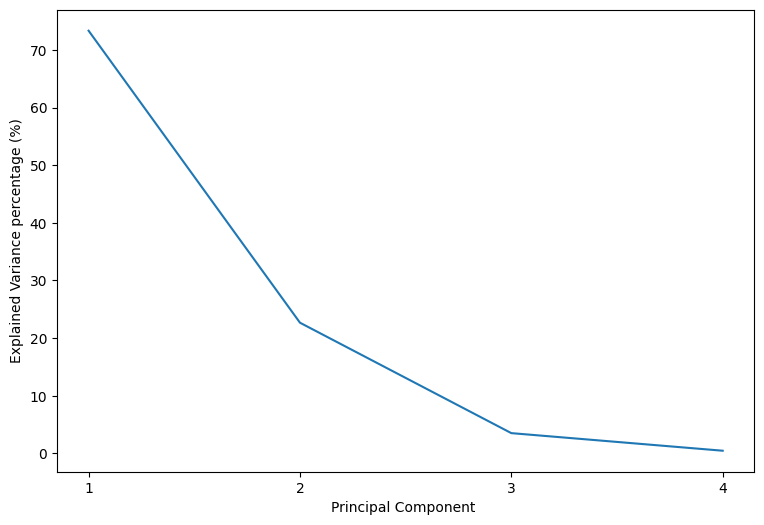

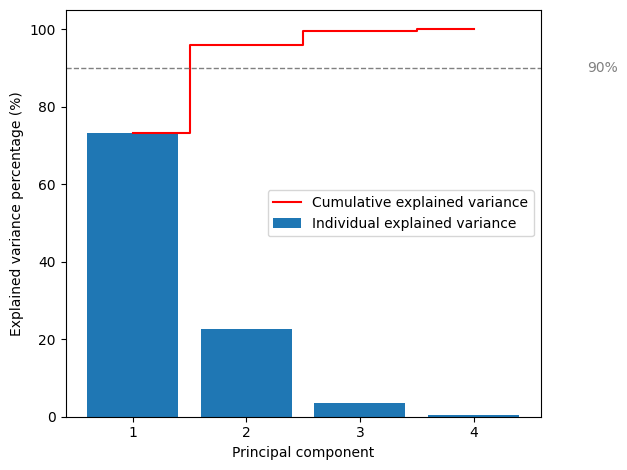

Number of principal components needed to explain 90% of variance: 2
The threshold of the PCA method for the given contamination rate: 14.564878298908921

Train-set with the threshold:



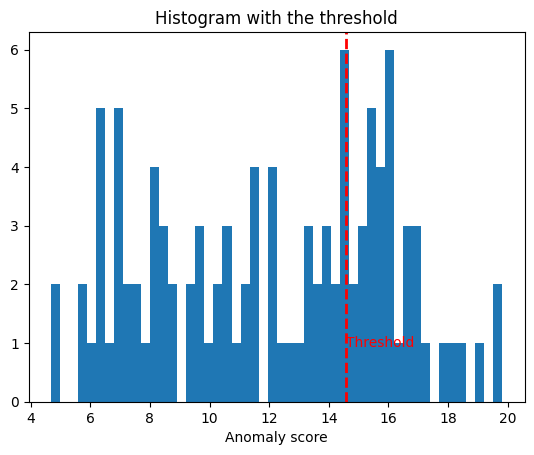



Another option to choose better threshold from the above plot.
Then run again for other contamination for better .


Test-set with the threshold:



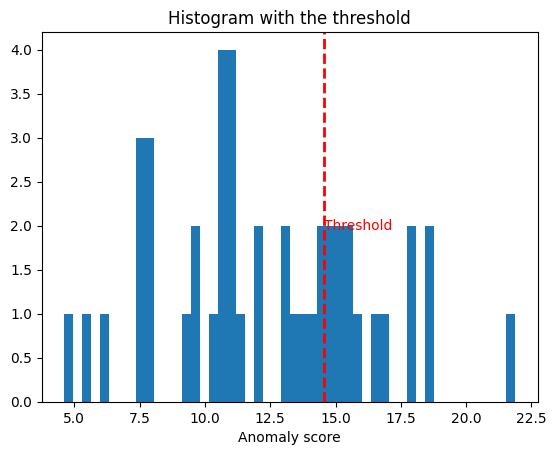



     Group  Count    Count %     0     1     2     3  Anomaly_Score
0   Normal     70  66.666667  0.20 -0.12  0.24  0.25           9.97
1  Novelty     35  33.333333 -0.42  0.11 -0.53 -0.60          16.38


     Group  Count    Count %     0     1     2     3  Anomaly_Score
0   Normal     30  66.666667  0.50 -0.28  0.64  0.65          10.17
1  Novelty     15  33.333333 -0.96  0.83 -1.15 -1.08          16.62


Confusion Matrix:



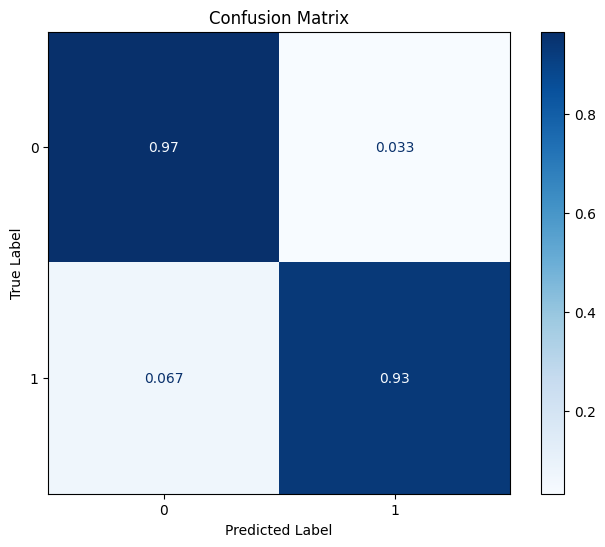

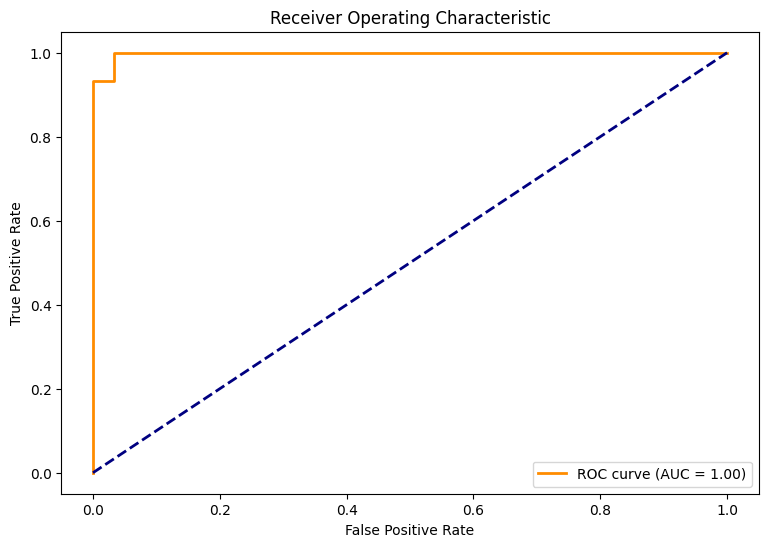



Accuracy:  0.95
Precision:  0.9655172413793104
Recall:  0.9333333333333333
F1 Score:  0.9491525423728815
AUC-ROC: 0.9978

For test data: ROC:0.9978, precision @ rank n:0.9333
None
The threshold of the PCA method for the given contamination rate: 0.11039969295357574

Train-set with the threshold:



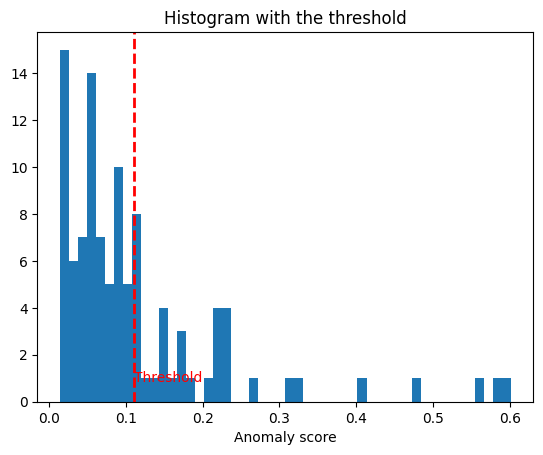



Another option to choose better threshold from the above plot.
Then run again for other contamination for better .


Test-set with the threshold:



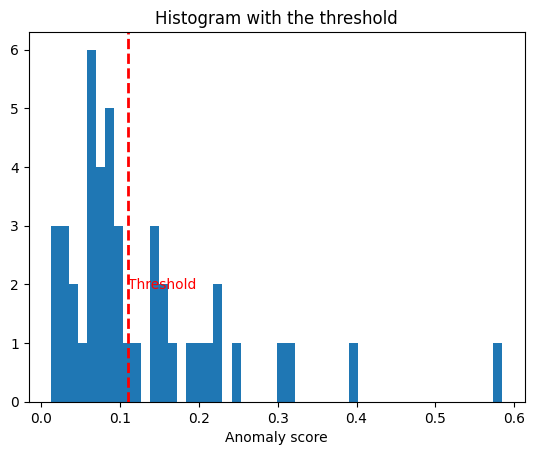



     Group  Count    Count %     0     1     2     3  Anomaly_Score
0   Normal     70  66.666667 -0.10 -0.03 -0.08 -0.07           0.06
1  Novelty     35  33.333333  0.17 -0.05  0.10  0.06           0.23


     Group  Count    Count %     0     1     2     3  Anomaly_Score
0   Normal     28  62.222222  0.01  0.02  0.01 -0.02           0.06
1  Novelty     17  37.777778  0.03  0.21  0.09  0.23           0.23


Confusion Matrix:



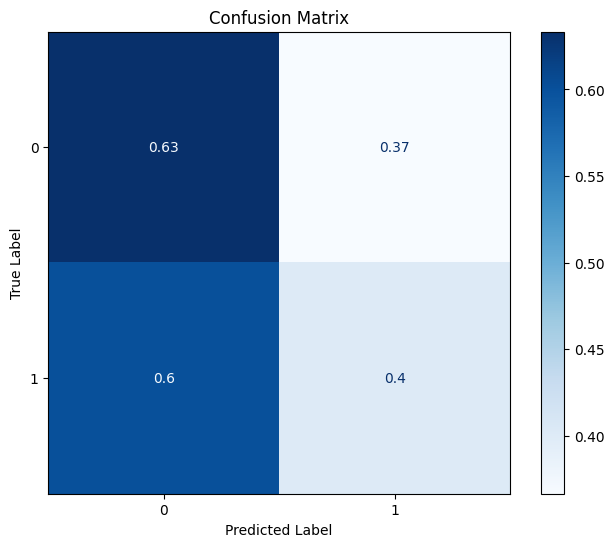

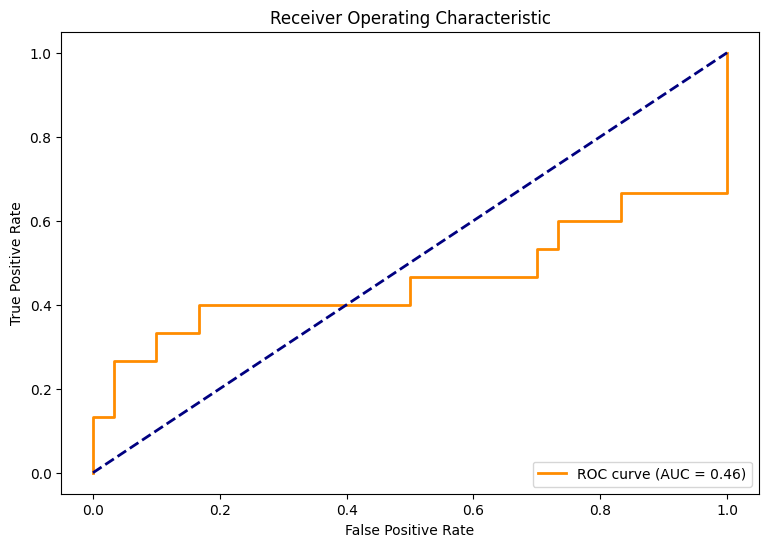



Accuracy:  0.5166666666666666
Precision:  0.5217391304347827
Recall:  0.4
F1 Score:  0.4528301886792453
AUC-ROC: 0.4600

For test data: ROC:0.46, precision @ rank n:0.4
None


In [201]:
iris = load_iris()

# OD based on Hoffman's Novelty Detection and using PyOD library.
# Here we train the model with normal and abnormal
# For the Iris dataset if we select the 0 class as inliers and 1&2 as outliers,
# the contamination ratio is more than 0.5 so we cannot do outlier detection. 
# For that reason We will say that 0 class is outlier and the others as inliers.

iris.target[iris.target == 1] = 2
iris.target[iris.target == 0] = 1
iris.target[iris.target == 2] = 0

X = iris.data
y = iris.target
X = scaler.fit_transform(X)

y_series = pd.Series(y)
counts = y_series.value_counts()
contamination = counts[1]/(counts[0] + counts[1])  # percentage of outliers of the dataset

print("The percentage of outliers: ", contamination)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# PCA
pca_kpca_with_metrics('pca', X_train, y_train, X_test, y_test, contamination=contamination)
# KPCA
pca_kpca_with_metrics('kpca', X_train, y_train, X_test, y_test, contamination=contamination)

The non-0s PCA components are: 
 4


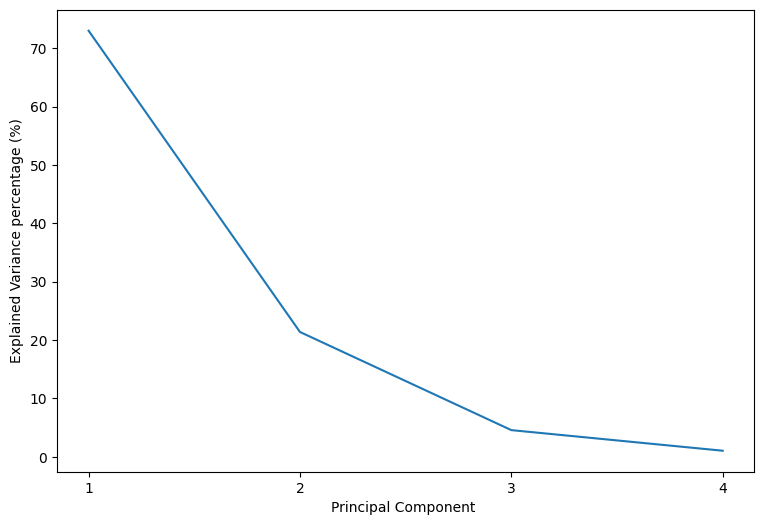

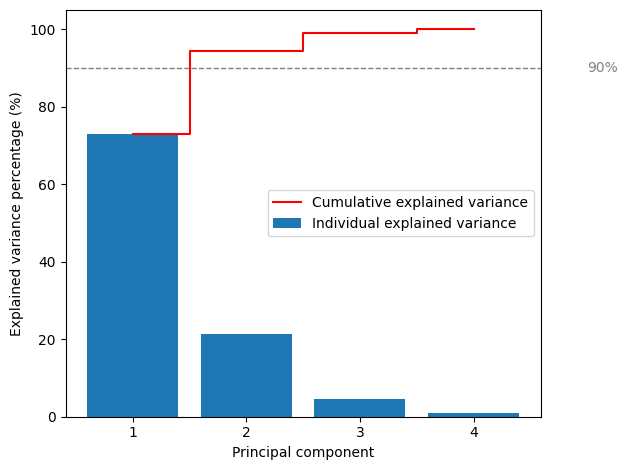

Number of principal components needed to explain 90% of variance: 2


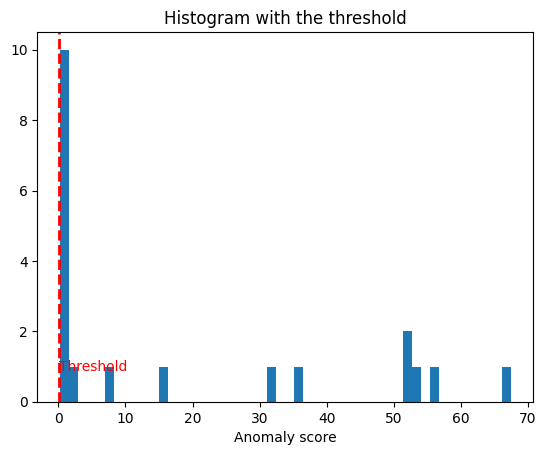

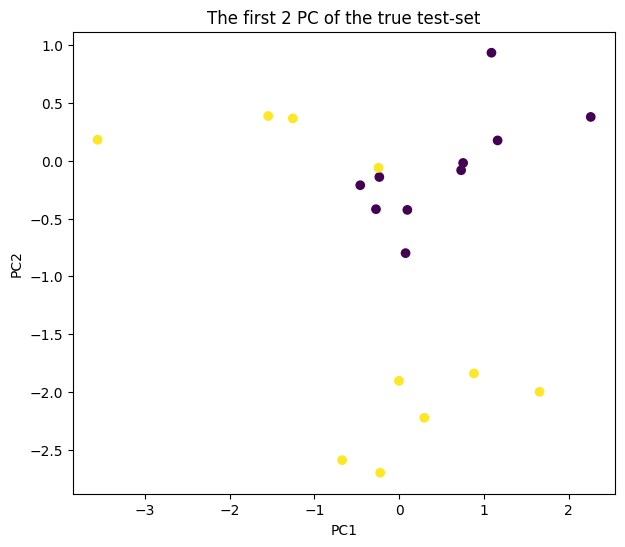

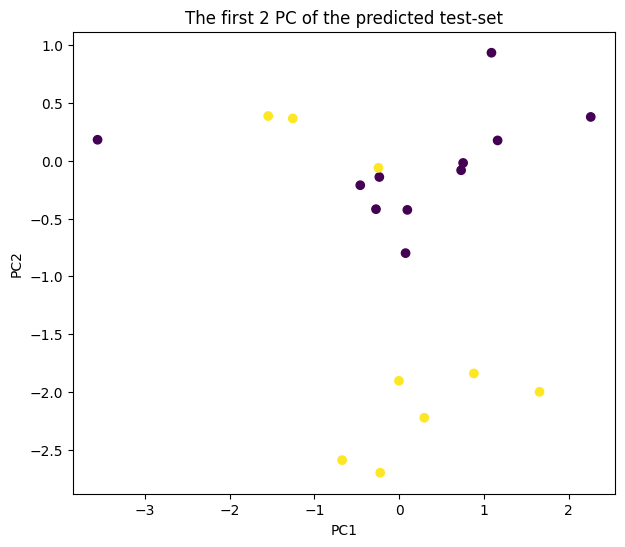

Confusion Matrix:



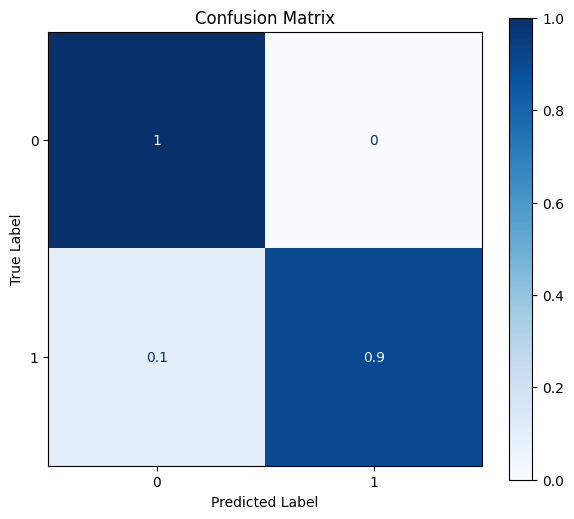

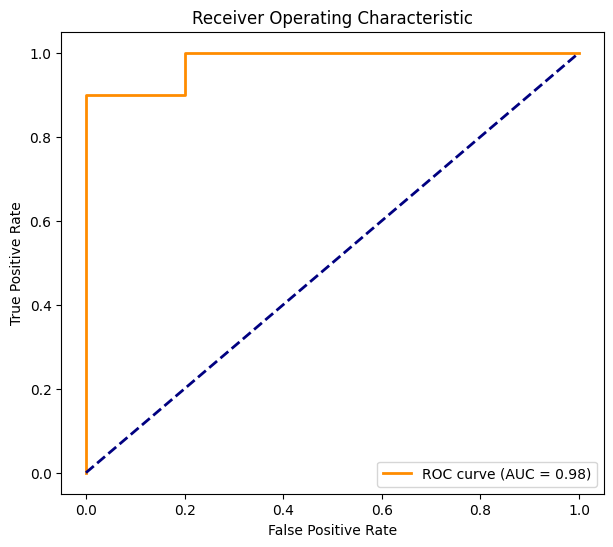



AUC-ROC: 0.9800
Accuracy: 0.9500
F1 Score: 0.9474
Precision: 1.0000
Recall: 0.9000
0.9473684210526316


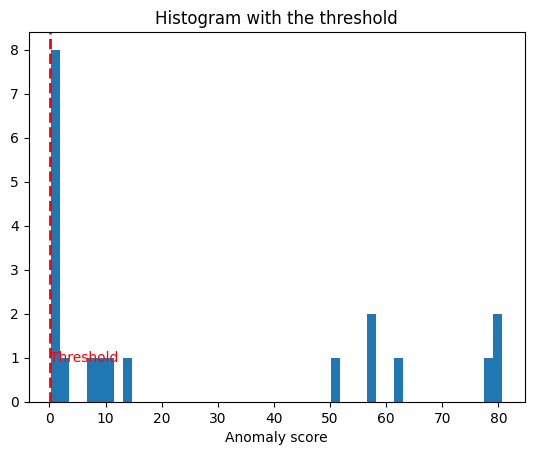

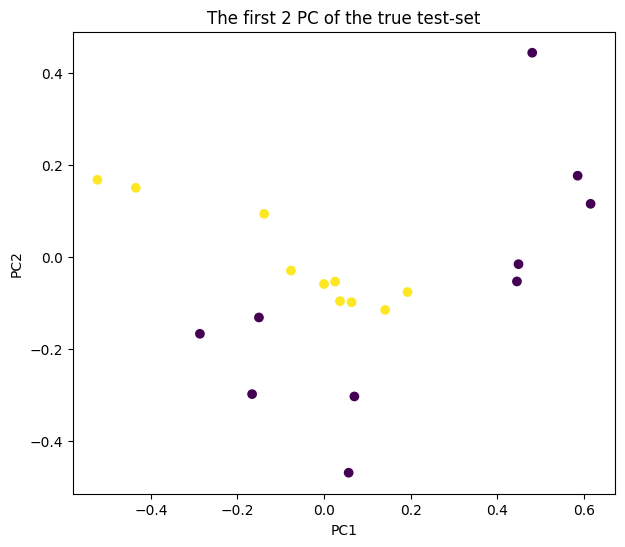

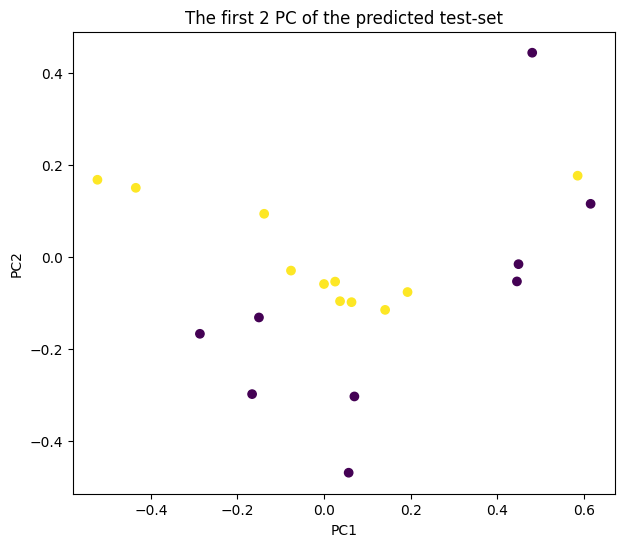

Confusion Matrix:



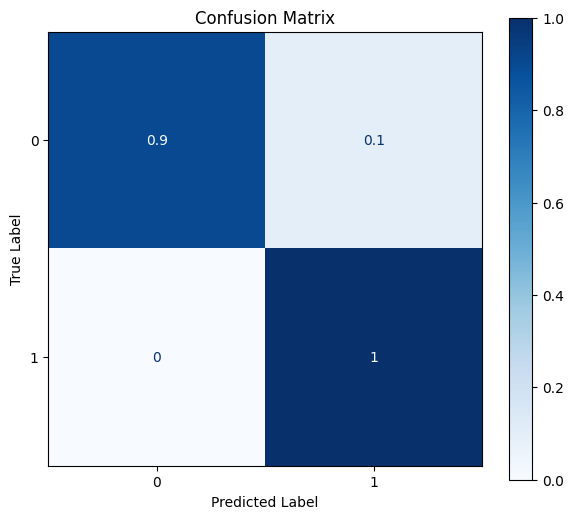

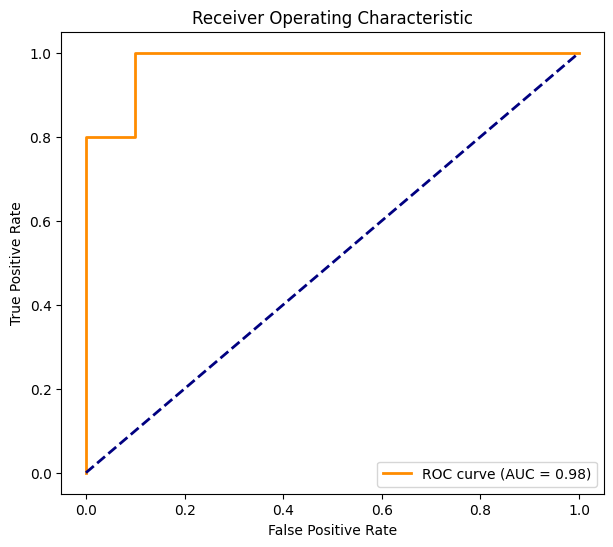



AUC-ROC: 0.9800
Accuracy: 0.9500
F1 Score: 0.9524
Precision: 0.9091
Recall: 1.0000
0.9523809523809523


In [233]:
iris = load_iris()

# AD based on Hoffman's Novelty Detection 
# For the Iris dataset if we select the 0 class as inliers and 1&2 as outliers the contamination ratio is more than 0.5 so we cannot do outlier detection. For that reason We will say that 0 class is outlier and the others as inliers.
iris.target[iris.target == 0] = 2
iris.target[iris.target == 1] = 0
iris.target[iris.target == 2] = 1

X = iris.data
y = iris.target
X = scaler.fit_transform(X)

#print("The percentage of outliers: ", contamination)
#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

X_train, X_test, X_test_n, X_test_a, y_train, y_test, y_test_n, y_test_a = split_data(X, y, 0, percentage=0.8)

# PCA
function_AD('pca', X_train, y_train, X_test, y_test, contamination=0)
# KPCA
function_AD('kpca', X_train, y_train, X_test, y_test, contamination=0)

In [ ]:
# AUC for OCC Park's Analysis for comparing the Performance
# KPCA
iris = load_iris()
X = iris.data
y = iris.target
X = scaler.fit_transform(X)

# FOR ALL CLASSES: Return AUC
#Kernel_PCA_AUC(X, y)

# FOR ALL CLASSES: Find the optimum gamma for the best AUC
Kernel_PCA_AUC(X, y, kernel_analysis=True)

# FOR Class: 0 : Return AUC
#Kernel_PCA_AUC(X, y)

# For Class: 0 : Find the optimum gamma for the best AUC
#Kernel_PCA_AUC(X, y, kernel_analysis=True)

## 2. A) Breast Cancer

In [203]:
dataset = load_breast_cancer()
dataset

target = dataset.target
contamination = sum(target) / len(target)
print("Contamination is:", contamination)

X = dataset.data
X = scaler.fit_transform(X)
y = target


Contamination is: 0.6274165202108963


In [204]:
dataset.target[dataset.target == 0] = 2
dataset.target[dataset.target == 1] = 0
dataset.target[dataset.target == 2] = 1
target = dataset.target
contamination = sum(target) / len(target)
print("Contamination is:", contamination)
X = dataset.data
X = scaler.fit_transform(X)
y = target

Contamination is: 0.37258347978910367


The non-0s PCA components are:  30


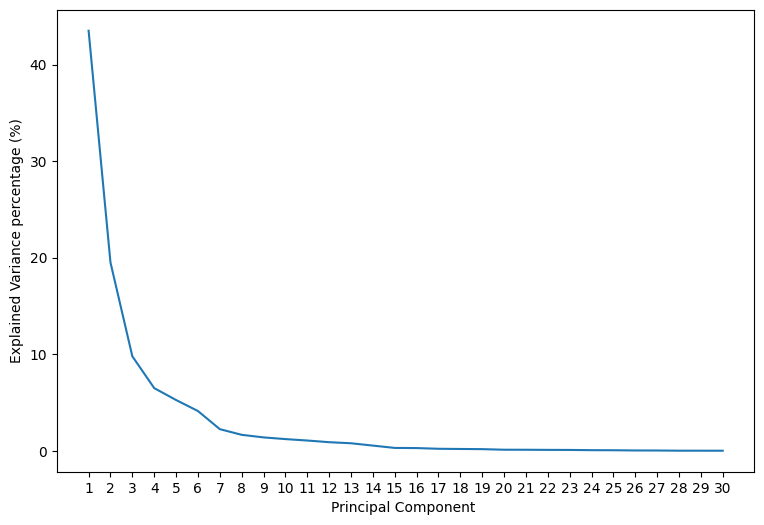

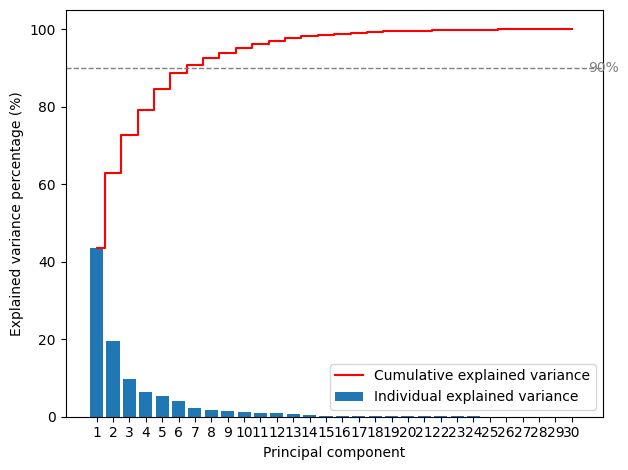

Number of principal components needed to explain 90% of variance: 7
The threshold of the PCA method for the given contamination rate: 905.3312174813765

Train-set with the threshold:



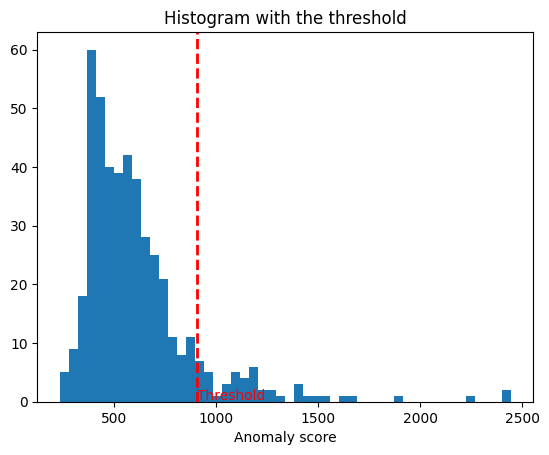



Another option to choose better threshold from the above plot.
Then run again for other contamination for better .


Test-set with the threshold:



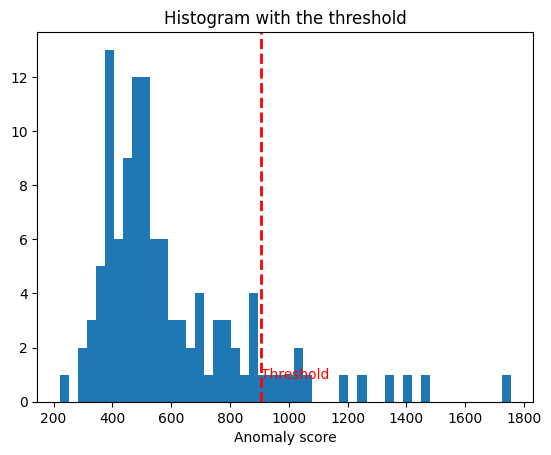



     Group  Count   Count %     0     1     2     3     4     5     6  ...  \
0   Normal    409  89.89011 -0.09 -0.07 -0.10 -0.11 -0.14 -0.20 -0.19  ...   
1  Novelty     46  10.10989  0.79  0.40  0.88  0.96  0.78  1.61  1.68  ...   

     21    22    23   24    25    26    27    28    29  Anomaly_Score  
0 -0.06 -0.11 -0.12 -0.1 -0.14 -0.14 -0.13 -0.07 -0.13         539.45  
1  0.29  0.92  0.98  0.5  1.19  1.32  1.09  0.73  1.08        1259.87  

[2 rows x 34 columns]


     Group  Count    Count %     0     1     2    3     4     5     6  ...  \
0   Normal    101  88.596491 -0.18 -0.06 -0.19 -0.2  0.08 -0.14 -0.23  ...   
1  Novelty     13  11.403509  1.50  1.29  1.57  1.6  0.93  1.58  1.77  ...   

     21    22    23    24    25    26    27    28    29  Anomaly_Score  
0 -0.06 -0.20 -0.19  0.08 -0.13 -0.23 -0.16 -0.10 -0.09         526.09  
1  1.30  1.69  1.72  0.70  1.38  1.34  1.44  0.54  0.83        1177.17  

[2 rows x 34 columns]


Confusion Matrix:



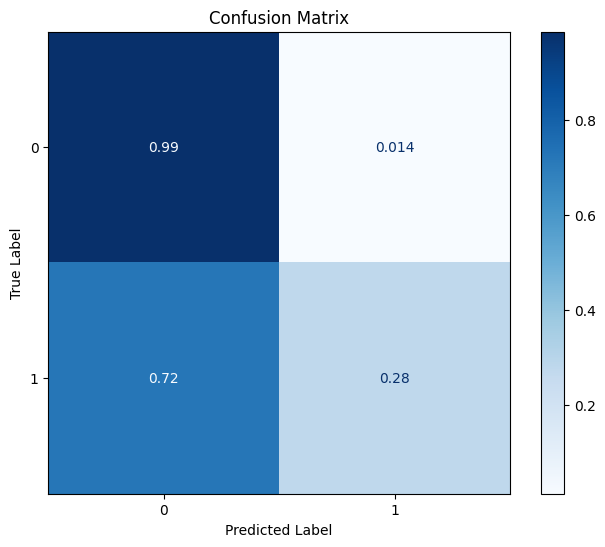

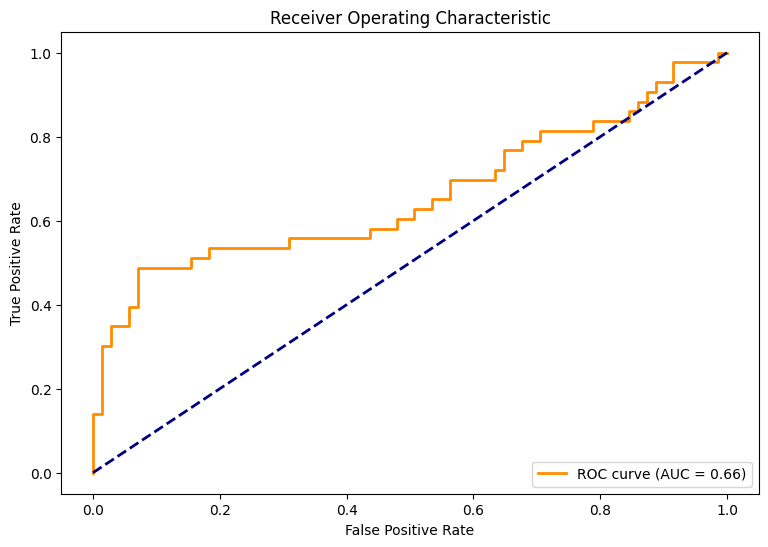



Accuracy:  0.6324926301998035
Precision:  0.9519553072625699
Recall:  0.27906976744186046
F1 Score:  0.43161094224924007
AUC-ROC: 0.6590

For test data: ROC:0.659, precision @ rank n:0.5349
None
The threshold of the PCA method for the given contamination rate: 1.0149623471542224

Train-set with the threshold:



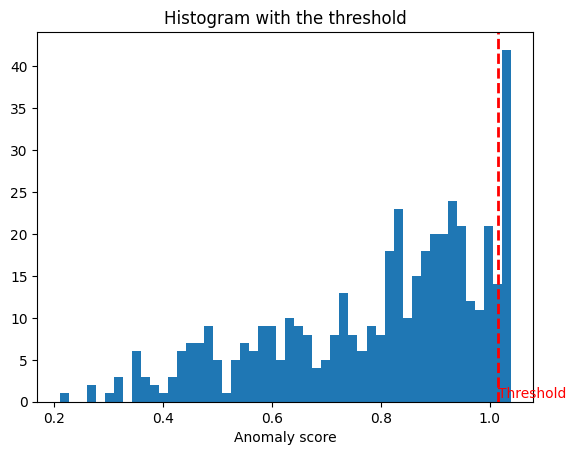



Another option to choose better threshold from the above plot.
Then run again for other contamination for better .


Test-set with the threshold:



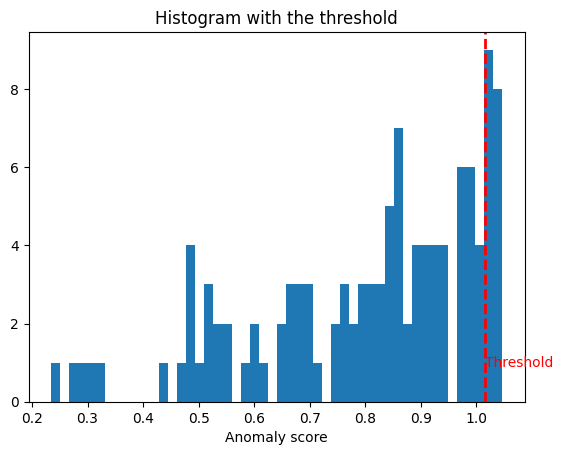



     Group  Count   Count %     0     1     2     3     4     5     6  ...  \
0   Normal    409  89.89011 -0.03 -0.04 -0.04 -0.05 -0.12 -0.16 -0.15  ...   
1  Novelty     46  10.10989  0.26  0.11  0.35  0.42  0.64  1.31  1.33  ...   

     21    22    23    24    25    26    27    28    29  Anomaly_Score  
0 -0.02 -0.04 -0.05 -0.07 -0.11 -0.09 -0.08 -0.08 -0.10           0.77  
1 -0.02  0.35  0.41  0.23  0.87  0.95  0.67  0.76  0.88           1.03  

[2 rows x 34 columns]


     Group  Count    Count %     0     1     2     3     4     5     6  ...  \
0   Normal     98  85.964912 -0.04 -0.01 -0.05 -0.07  0.05 -0.09 -0.13  ...   
1  Novelty     16  14.035088  0.33  0.76  0.40  0.46  0.93  0.94  0.74  ...   

     21    22    23    24    25    26    27    28    29  Anomaly_Score  
0 -0.02 -0.07 -0.07  0.06 -0.07 -0.12 -0.03 -0.09 -0.11           0.77  
1  0.79  0.54  0.61  0.68  0.72  0.42  0.40  0.33  0.79           1.03  

[2 rows x 34 columns]


Confusion Matrix:



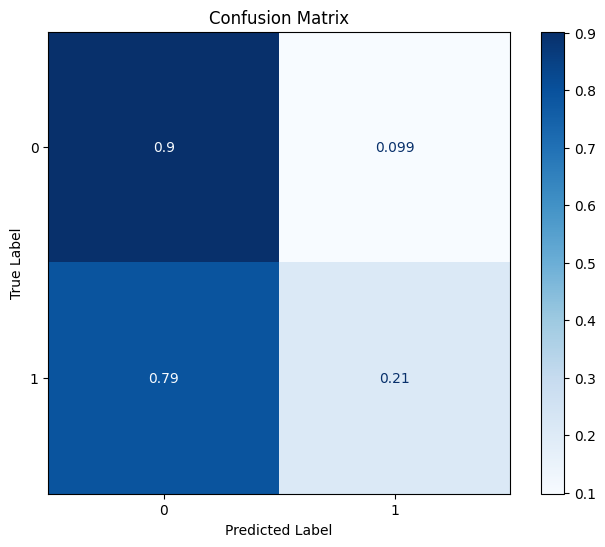

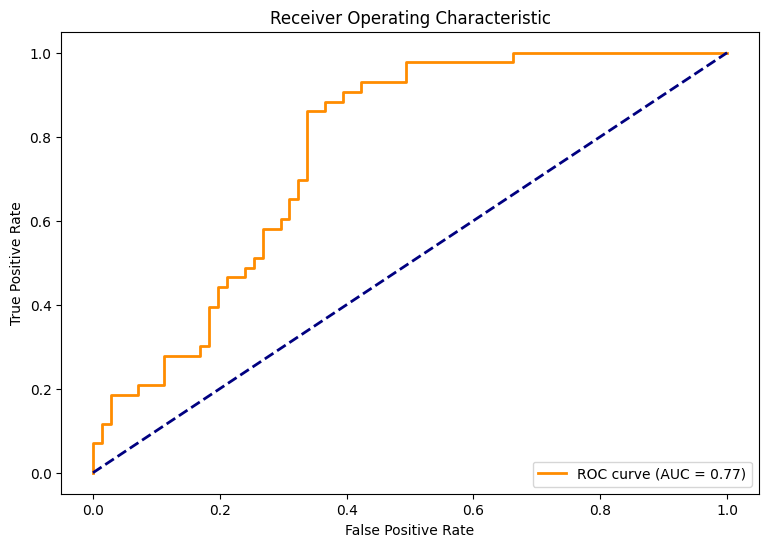



Accuracy:  0.5553553881428104
Precision:  0.6797872340425531
Recall:  0.20930232558139536
F1 Score:  0.32006010518407213
AUC-ROC: 0.7655

For test data: ROC:0.7655, precision @ rank n:0.5581
None


In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# PCA
pca_kpca_with_metrics('pca', X_train, y_train, X_test, y_test)
# KPCA
pca_kpca_with_metrics('kpca', X_train, y_train, X_test, y_test)

The non-0s PCA components are: 
 30


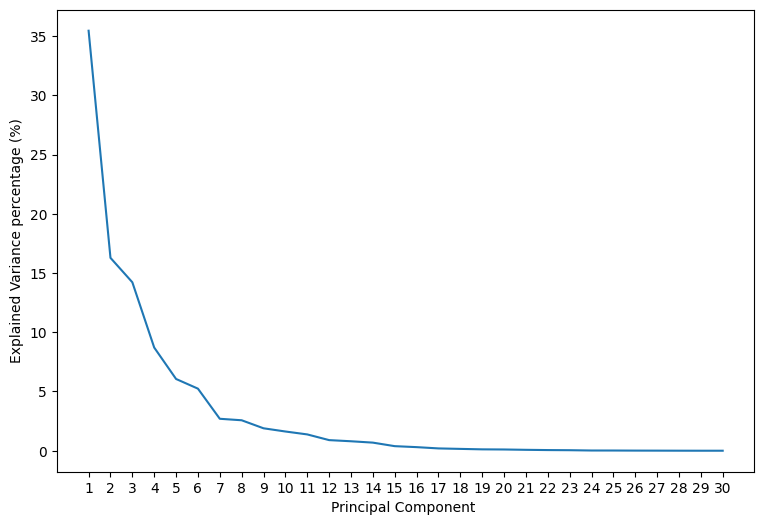

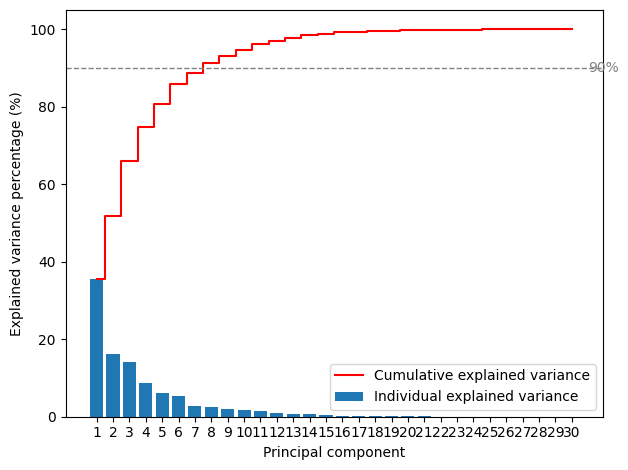

Number of principal components needed to explain 90% of variance: 8


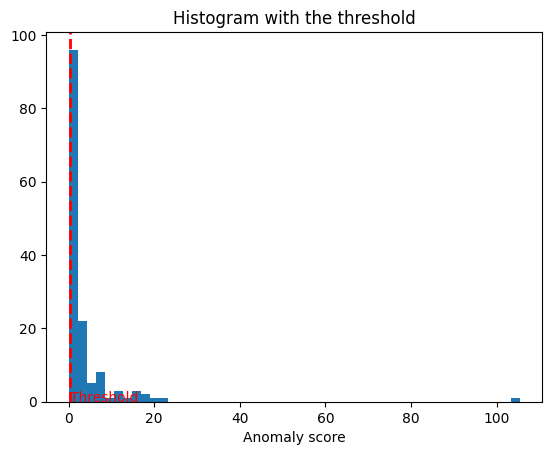

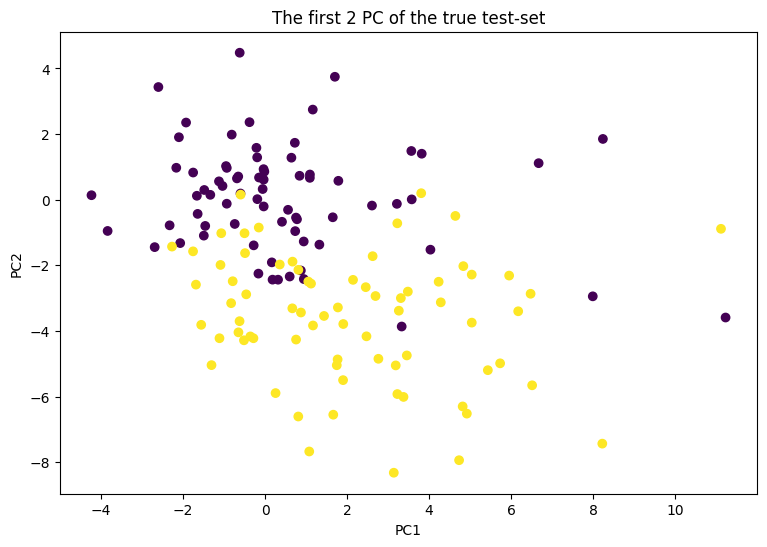

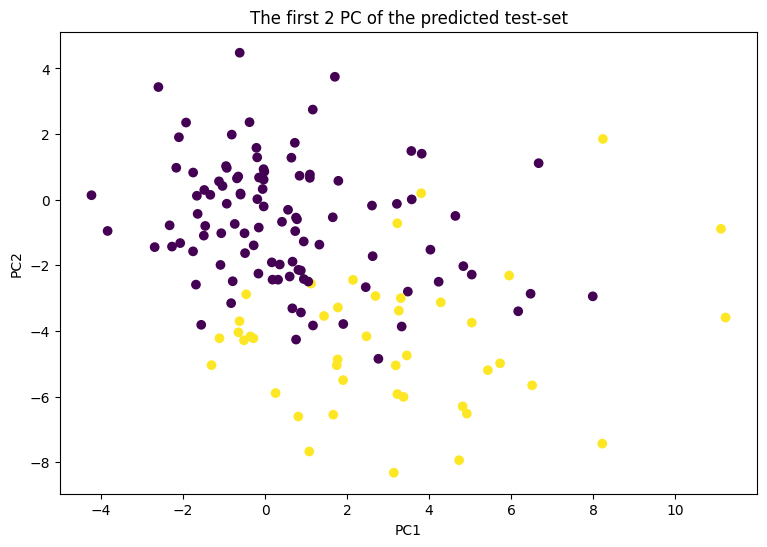

Confusion Matrix:



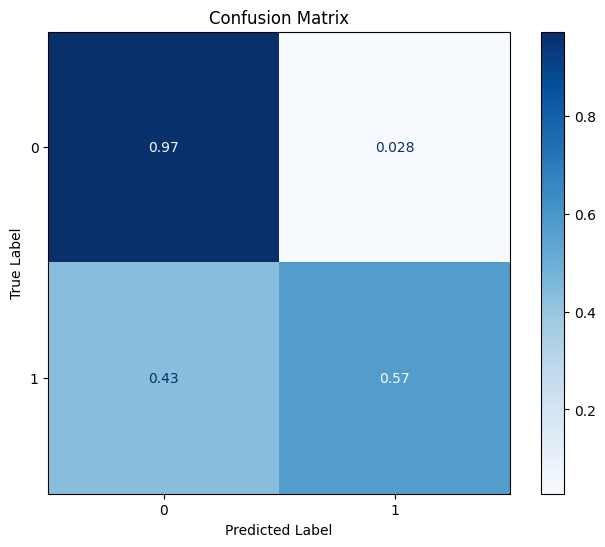

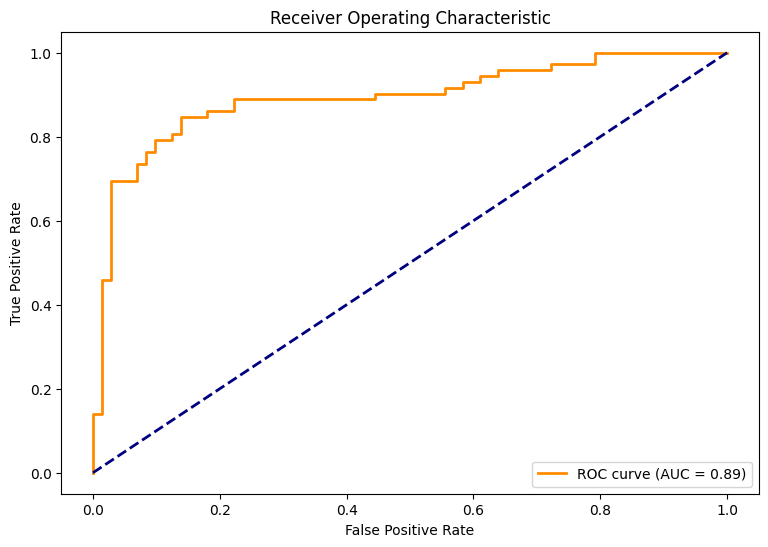



Accuracy:  0.7708333333333333
Precision:  0.9534883720930233
Recall:  0.5694444444444444
F1 Score:  0.7130434782608696
AUC-ROC: 0.8935


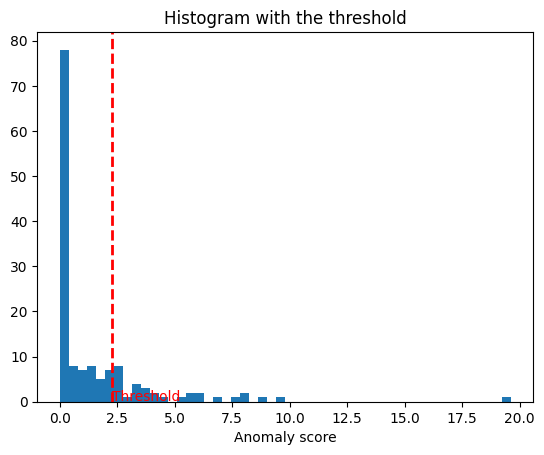

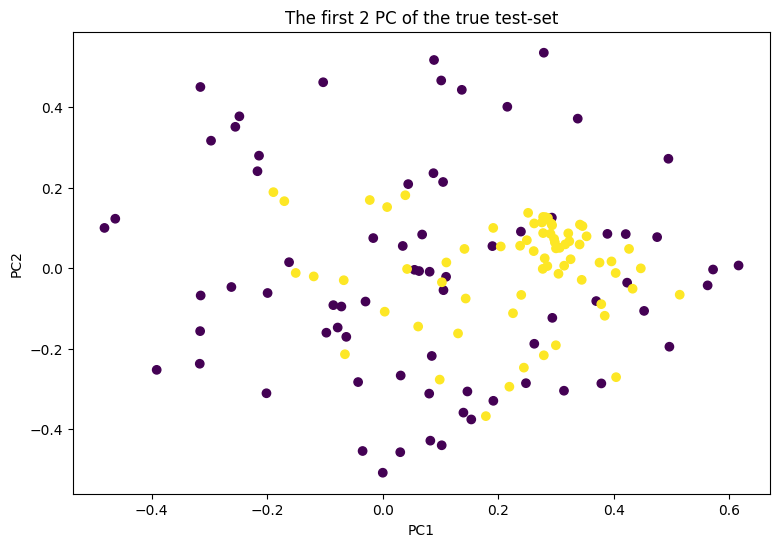

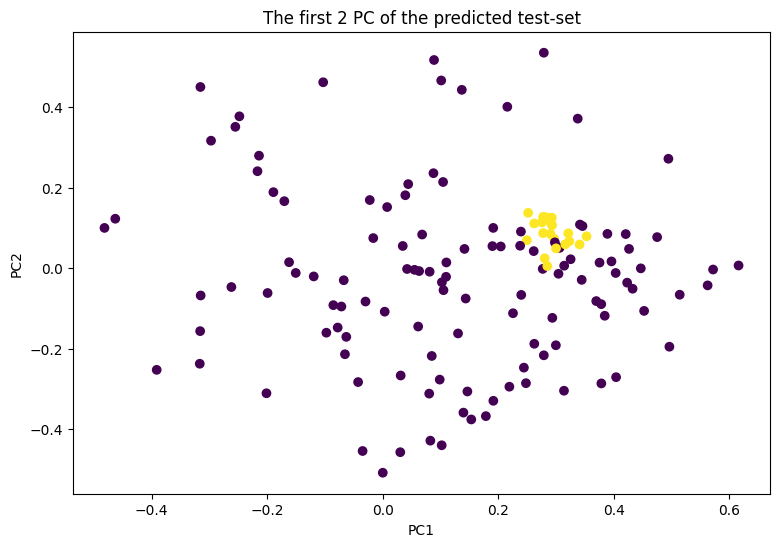

Confusion Matrix:



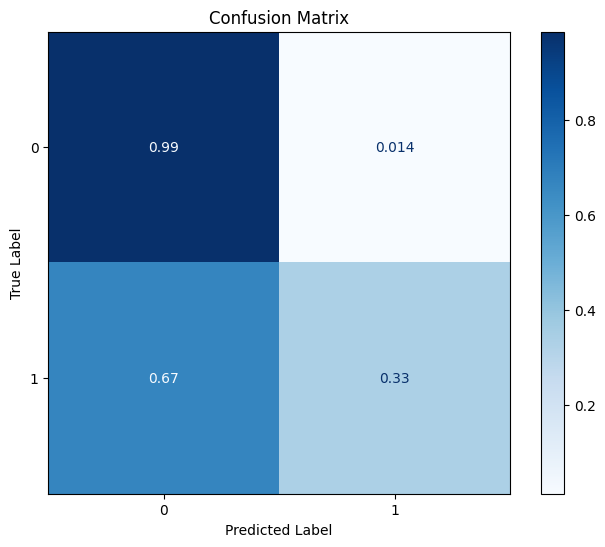

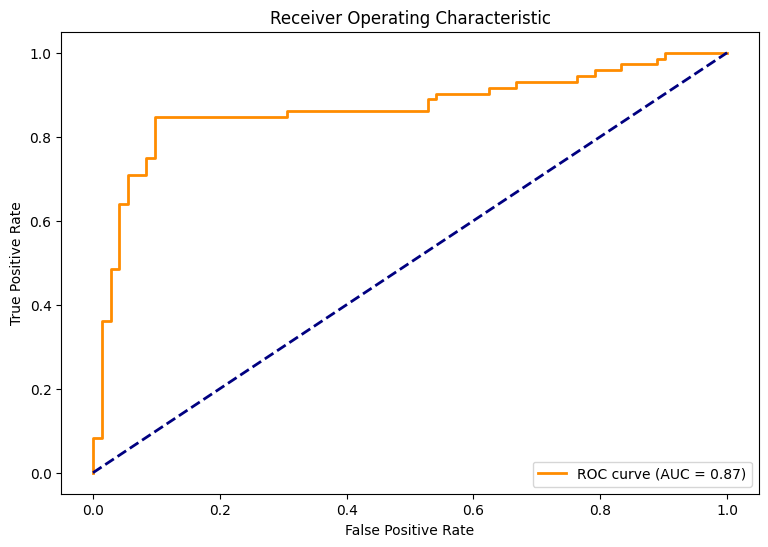



Accuracy:  0.6597222222222222
Precision:  0.96
Recall:  0.3333333333333333
F1 Score:  0.49484536082474223
AUC-ROC: 0.8671


In [208]:
X_train, X_test, X_test_n, X_test_a, y_train, y_test, y_test_n, y_test_a = split_data(X, y, 0, percentage=0.8)

# PCA
function_AD('pca', X_train, y_train, X_test, y_test)
# KPCA
function_AD('kpca', X_train, y_train, X_test, y_test)

In [207]:
# FOR ALL CLASSES: Return AUC
Kernel_PCA_AUC(X, y)

# FOR ALL CLASSES: Find the optimum gamma for the best AUC
#Kernel_PCA_AUC(X, y, kernel_analysis=True)

# FOR Class: 0 : Return AUC
#Kernel_PCA_AUC(X, y)

# For Class: 0 : Find the optimum gamma for the best AUC
#Kernel_PCA_AUC(X, y, kernel_analysis=True)


All different classes:  [0 1]

Number of classes:  2

For the class:  0

AUC:  0.9430941358024691

For the class:  1

AUC:  0.8674959437533801


##2. B) Breast Cancer 

In [234]:

dataset = datasets[10]
#print(dataset)
df = pd.read_csv(directory_path + dataset, header=None) 

X = df.iloc[:, :-1].values
X = scaler.fit_transform(X)
y = df.iloc[:, -1].values

counts = df[9].value_counts()
contamination = counts[1]/(counts[0] +counts[1]) # percentage of outliers
#print(X.shape)
#print(y.shape)


In [ ]:
X = df.iloc[:, :-1].values
X = scaler.fit_transform(X)
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# PCA
pca_kpca_with_metrics('pca', X_train, y_train, X_test, y_test)
# KPCA
pca_kpca_with_metrics('kpca', X_train, y_train, X_test, y_test)

In [ ]:
X = df.iloc[:, :-1].values
X = scaler.fit_transform(X)
y = df.iloc[:, -1].values

X_train, X_test, X_test_n, X_test_a, y_train, y_test, y_test_n, y_test_a = split_data(X, y, 0, percentage=0.6)

# PCA
function_AD('pca', X_train, y_train, X_test, y_test)
# KPCA
function_AD('kpca', X_train, y_train, X_test, y_test)

In [232]:
# FOR ALL CLASSES: Return AUC
#Kernel_PCA_AUC(X, y)

# FOR ALL CLASSES: Find the optimum gamma for the best AUC
Kernel_PCA_AUC(X, y, kernel_analysis=True)

# FOR Class: 0 : Return AUC
#Kernel_PCA_AUC(X, y)

# For Class: 0 : Find the optimum gamma for the best AUC
#Kernel_PCA_AUC(X, y, kernel_analysis=True)


All different classes:  [0 1]

Number of classes:  2

For the class:  0

 gamma:  0.0009765625

AUC:  0.9944451458149224

For the class:  0

 gamma:  0.0020256934461839685

AUC:  0.9944451458149224

For the class:  0

 gamma:  0.004201916352422586

AUC:  0.9941926524428734

For the class:  0

 gamma:  0.00871607748251206

AUC:  0.9928039388966039

For the class:  0

 gamma:  0.018079847457542493

AUC:  0.9911627319782855

For the class:  0

 gamma:  0.03750320998681571

AUC:  0.990531498548163

For the class:  0

 gamma:  0.07779328684150147

AUC:  0.992298952152506

For the class:  0

 gamma:  0.1613673997434256

AUC:  0.9957076126751673

For the class:  0

 gamma:  0.33472602530611795

AUC:  0.9955813659891428

For the class:  0

 gamma:  0.6943255713073277

AUC:  0.9955813659891427

For the class:  0

 gamma:  1.440246537538758

AUC:  0.9953288726170938

For the class:  0

 gamma:  2.987517923308969

AUC:  0.9949501325590203

For the class:  0

 gamma:  6.197038569066624

AUC:  0.9

##3. Vowel

## 4. Liver


0s:  255

1s:  82
0.2433234421364985
The non-0s PCA components are:  6


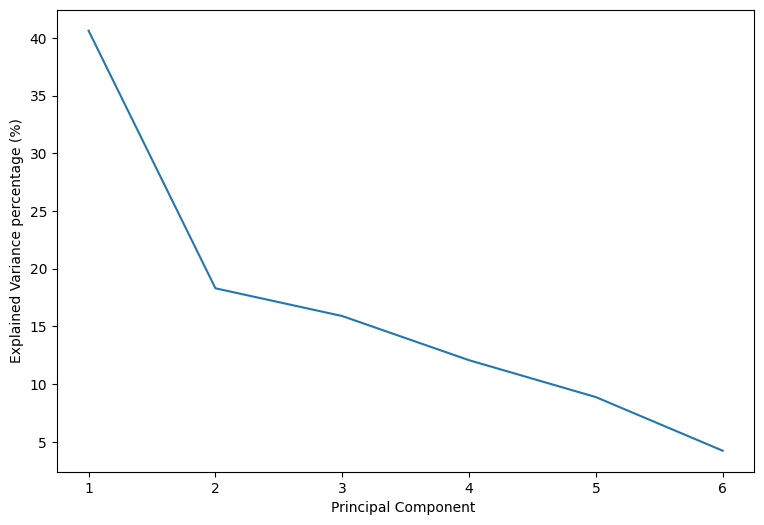

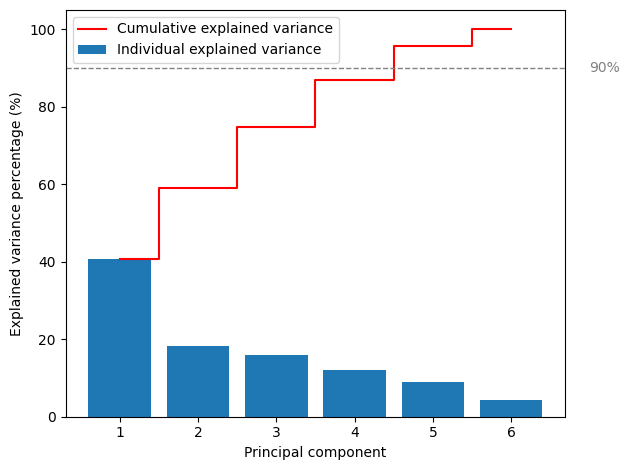

Number of principal components needed to explain 90% of variance: 5
The threshold of the PCA method for the given contamination rate: 102.7478536475477

Train-set with the threshold:



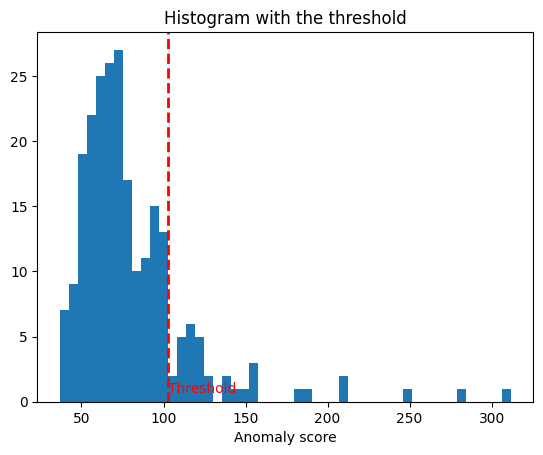



Another option to choose better threshold from the above plot.
Then run again for other contamination for better .


Test-set with the threshold:



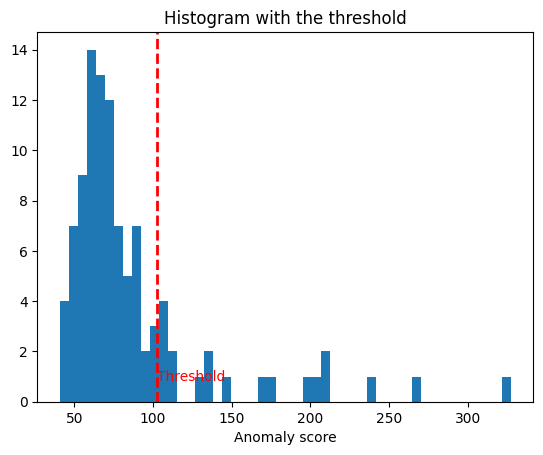



     Group  Count    Count %     0     1     2     3     4     5  \
0   Normal    201  85.531915 -0.03 -0.03 -0.22 -0.25 -0.23 -0.23   
1  Novelty     34  14.468085  0.33  0.73  1.15  1.20  1.07  1.35   

   Anomaly_Score  
0          69.58  
1         147.24  


     Group  Count    Count %     0     1     2     3     4     5  \
0   Normal     82  80.392157 -0.13 -0.16 -0.20 -0.25 -0.21 -0.16   
1  Novelty     20  19.607843  0.29 -0.31  1.11  1.51  1.39  0.65   

   Anomaly_Score  
0          68.23  
1         164.88  


Confusion Matrix:



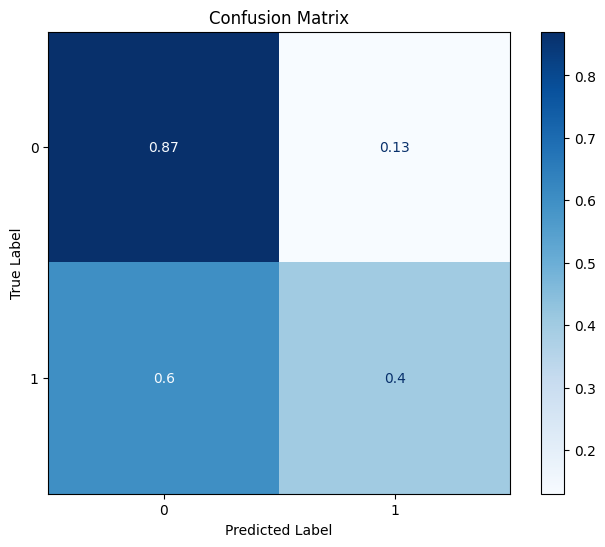

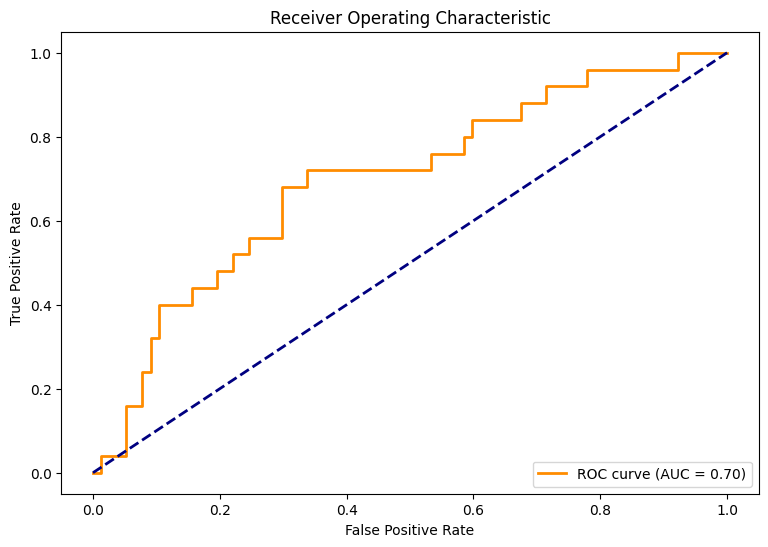



Accuracy:  0.6350649350649351
Precision:  0.7549019607843138
Recall:  0.4
F1 Score:  0.5229202037351444
AUC-ROC: 0.6971

For test data: ROC:0.6971, precision @ rank n:0.44
None
The threshold of the PCA method for the given contamination rate: 0.5862843557464334

Train-set with the threshold:



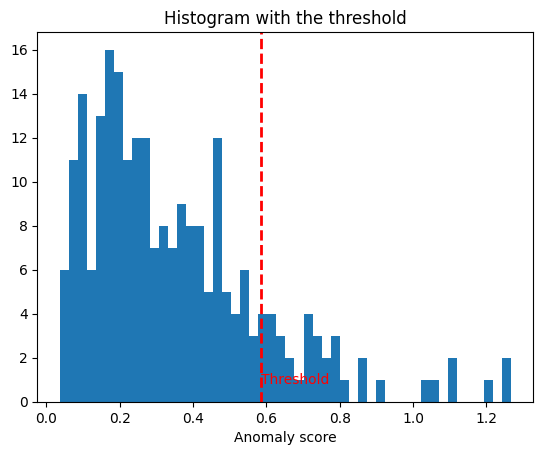



Another option to choose better threshold from the above plot.
Then run again for other contamination for better .


Test-set with the threshold:



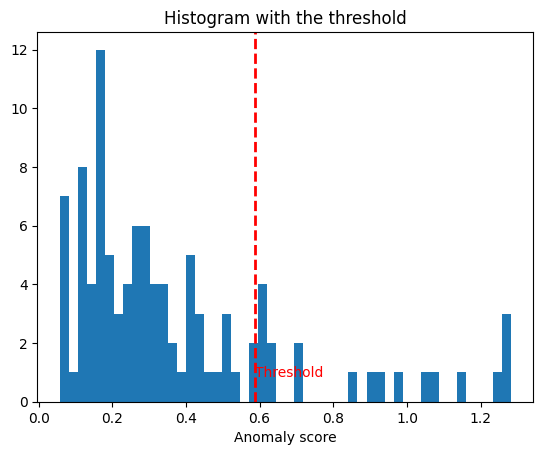



     Group  Count    Count %     0     1     2     3     4     5  \
0   Normal    201  85.531915  0.02 -0.03 -0.17 -0.22 -0.22 -0.16   
1  Novelty     34  14.468085  0.05  0.75  0.86  1.00  1.01  0.97   

   Anomaly_Score  
0           0.28  
1           0.81  


     Group  Count    Count %     0     1     2     3     4     5  \
0   Normal     81  79.411765 -0.02 -0.16 -0.28 -0.26 -0.21 -0.10   
1  Novelty     21  20.588235 -0.14 -0.31  1.34  1.45  1.31  0.37   

   Anomaly_Score  
0           0.25  
1           0.87  


Confusion Matrix:



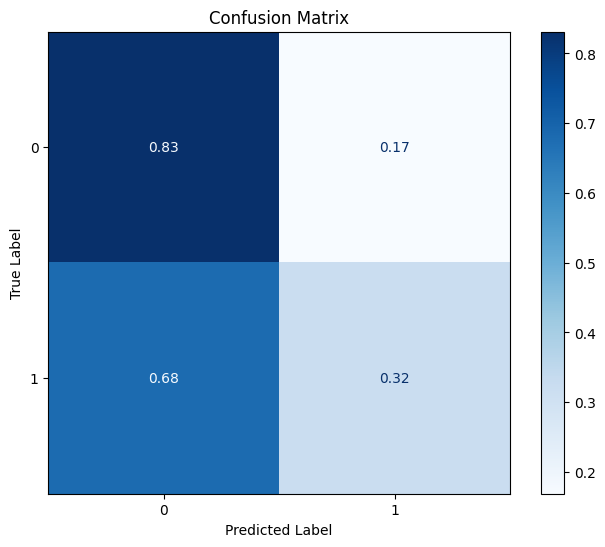

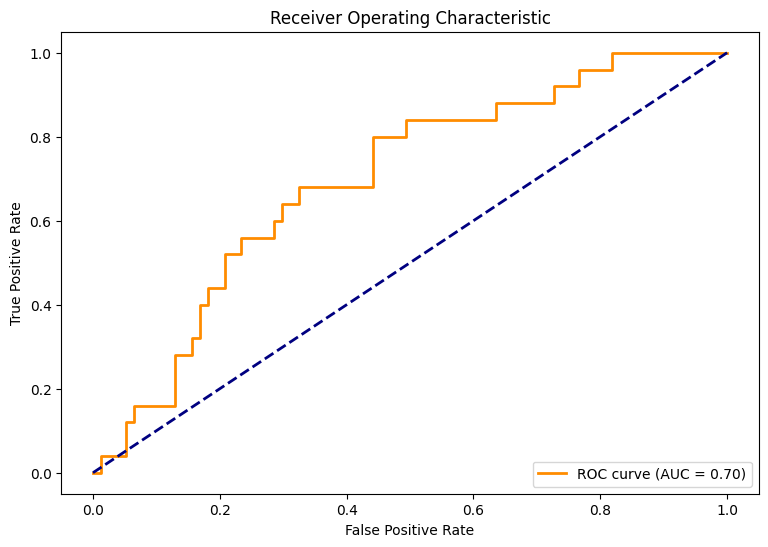



Accuracy:  0.5755844155844156
Precision:  0.6546227417640808
Recall:  0.32
F1 Score:  0.42986741102582
AUC-ROC: 0.6971

For test data: ROC:0.6971, precision @ rank n:0.44
None


In [249]:
dataset = datasets[5]
df = pd.read_csv(directory_path + dataset, header=None)
df = df.drop_duplicates(keep=False)
df = df.reset_index(drop=True)
df['target'] = df[5].apply(lambda x: 0  if x <= 5 else 1)
X = df.iloc[:, :-2].values
y = df.iloc[:, -1].values
X = scaler.fit_transform(X)
counts = df['target'].value_counts()

contamination = counts[1]/(counts[0] +counts[1])


print("\n0s: ",counts[0])
print("\n1s: ",counts[1])
print(contamination)

#contamination =   # percentage of outliers
n_features = 5              # number of features
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)


counts = y_train.sum()
contamination = counts/(len(df)+counts)

# PCA
pca_kpca_with_metrics('pca', X_train, y_train, X_test, y_test, contamination=contamination)
# KPCA
pca_kpca_with_metrics('kpca', X_train, y_train, X_test, y_test, contamination=contamination)

The non-0s PCA components are: 
 7


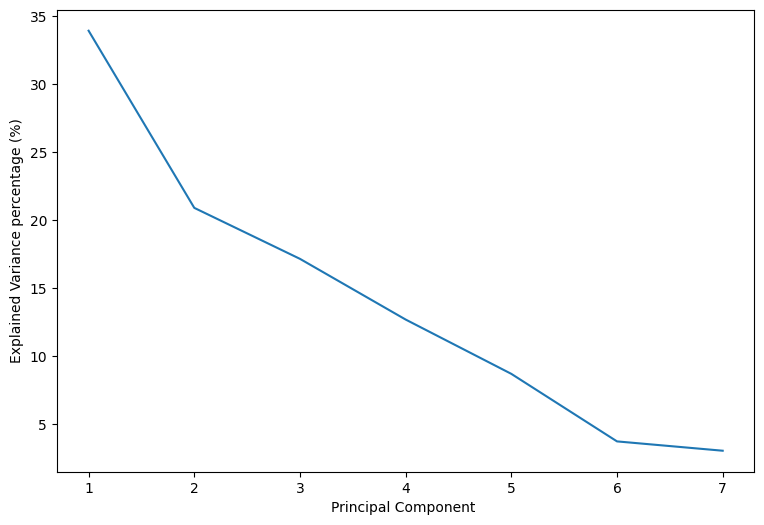

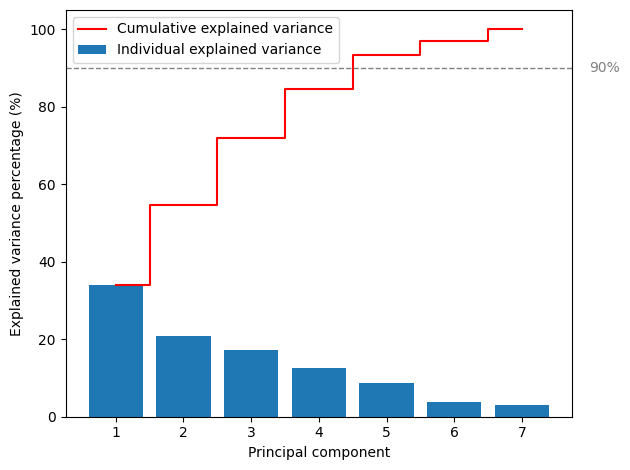

Number of principal components needed to explain 90% of variance: 5


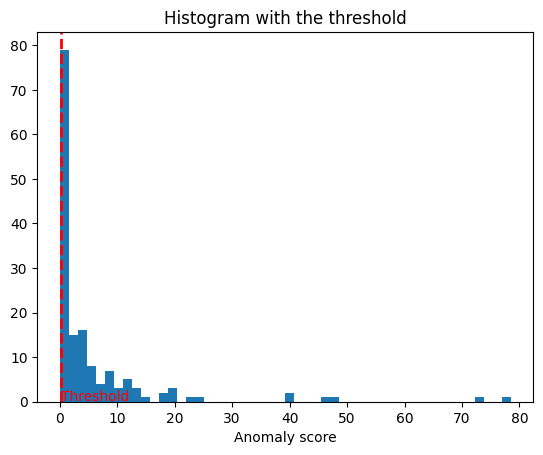

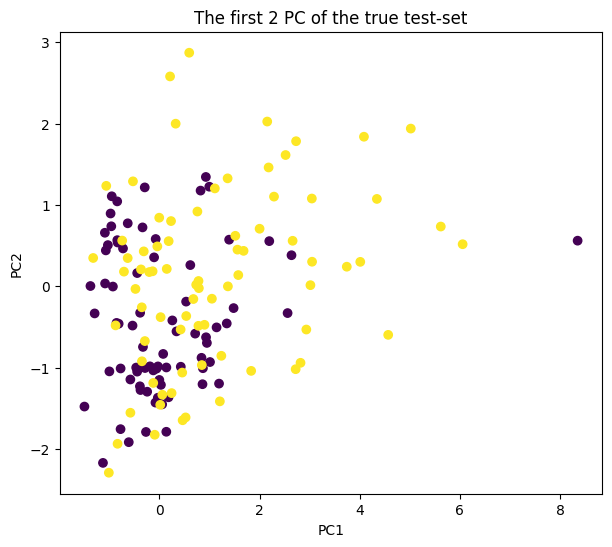

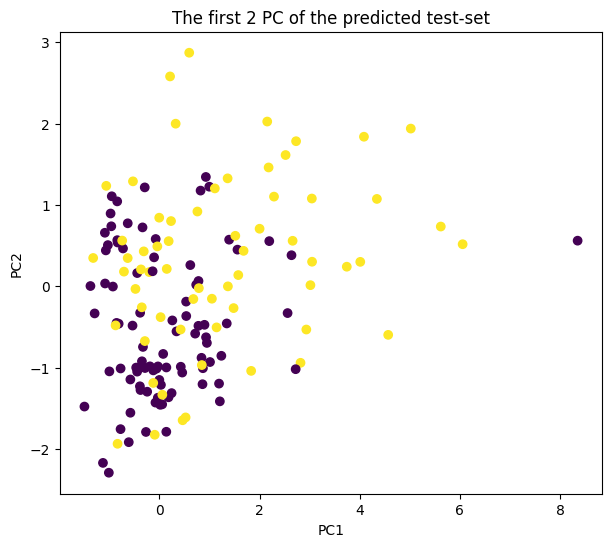

Confusion Matrix:



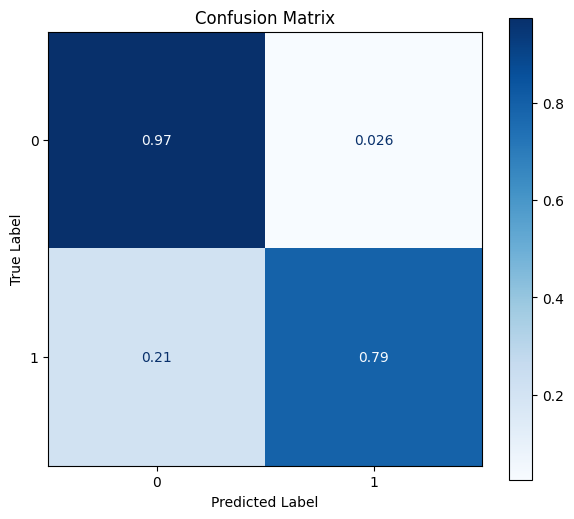

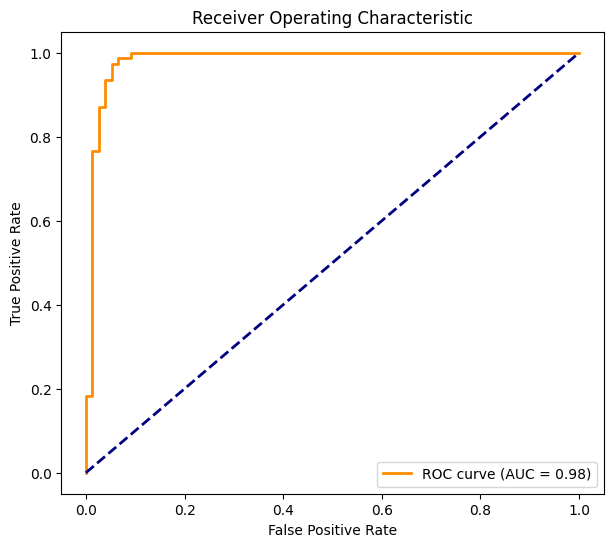



AUC-ROC: 0.9831
Accuracy: 0.8831
F1 Score: 0.8714
Precision: 0.9683
Recall: 0.7922
0.8714285714285714


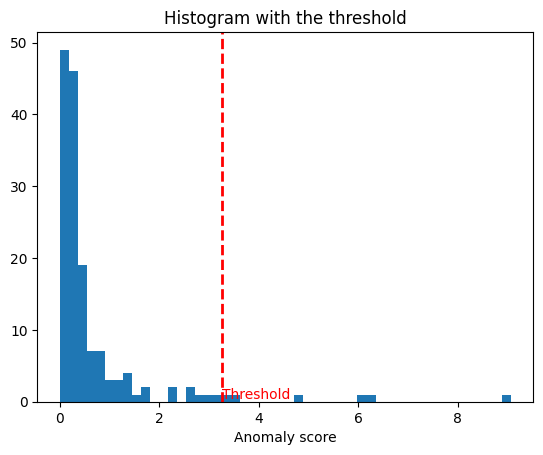

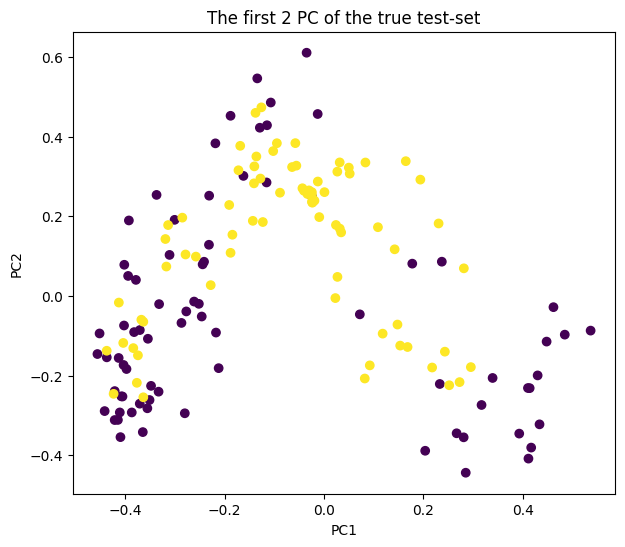

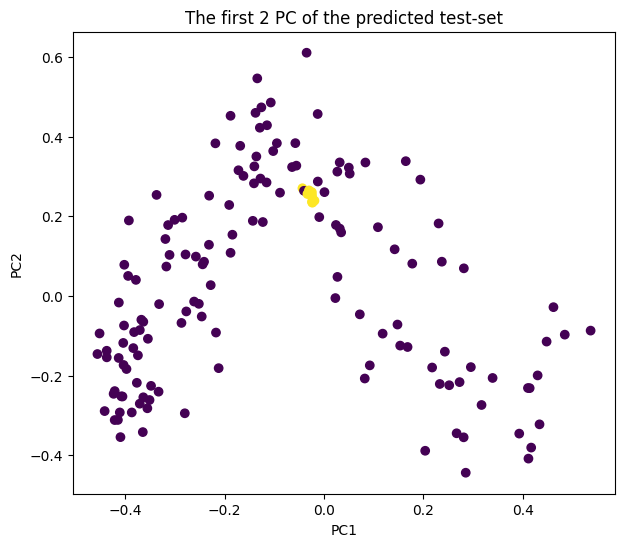

Confusion Matrix:



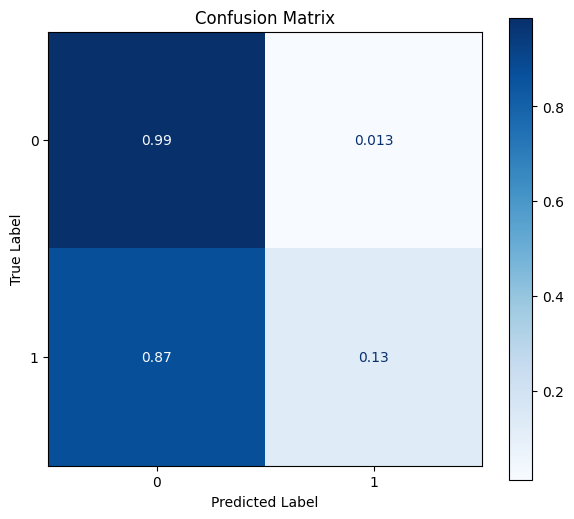

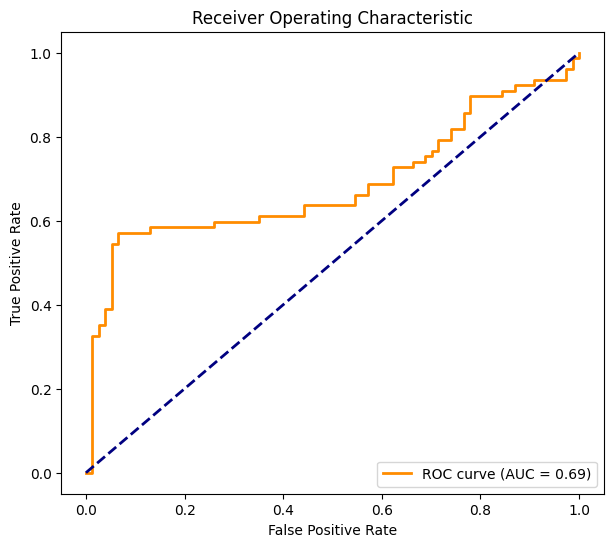



AUC-ROC: 0.6868
Accuracy: 0.5584
F1 Score: 0.2273
Precision: 0.9091
Recall: 0.1299
0.22727272727272727


In [243]:
X = df.iloc[:, :-1].values
X = scaler.fit_transform(X)
y = df.iloc[:, -1].values

X_train, X_test, X_test_n, X_test_a, y_train, y_test, y_test_n, y_test_a = split_data(X, y, 0, percentage=0.7)

# PCA
function_AD('pca', X_train, y_train, X_test, y_test)
# KPCA
function_AD('kpca', X_train, y_train, X_test, y_test)

##5. Arrhythmia

# 7 Analysis of parameters for better AUC, Kernel-PCA

In [ ]:
best_auc = 0.0
best_f1 = 0.0
optimum_gamma = 0
optimum_kernel = ''
#optimum_degree = 0
#optimum_coef0 = 0
optimum_n_components = 0

kernels = [
          'cosine', 
           'rbf' ,
           'sigmoid',
           'poly'
           ]

gammas = [0.001, 0.01, 0.1, 10, 100]
#degrees = [1, 2, 3]
#coef0s = [1, 2]
nn_components = np.arange(2, 101, 2)

auc_values = [[] for _ in range(len(gammas))]

for kernel in kernels:
  for n_components in nn_components:
    for gamma_idx, gamma in enumerate(gammas):
      #for degree in degrees:
        #for coef0 in coef0s:     
          new_auc, new_f1 = function_AD('kpca', X_train, y_train, X_test, y_test, 
                                        n_components=n_components, 
                                        analysis=True, 
                                        kernel=kernel, 
                                        gamma=gamma, 
                                        #degree=degree, 
                                        #coef0=coef0
                                        )
          print("\nAUC: ", new_auc," and f1: ", new_f1 )
          auc_values[gamma_idx].append(new_auc)
          #if  new_f1 > best_f1:
          if new_auc > best_auc:
              best_auc = new_auc
              best_f1 = new_f1
              optimum_gamma = gamma
              optimum_kernel = kernel
              #optimum_degree = degree
              #optimum_coef0 = coef0
              optimum_n_components = n_components
              print("=====================")
              print("\nBest AUC: ", best_auc)
              print("\nBest F1: ", best_f1)
              print("\noptimum_kernel: ", optimum_kernel)
              print("\noptimum_n_components: ", optimum_n_components)
              print("\noptimum_gamma: ", optimum_gamma)
              #print("\noptimum_degree: ", optimum_degree)
              #print("\noptimum_coef0: ", optimum_coef0)
              print("=====================")

print("=====================")
print("\nBest AUC: ", best_auc)
print("\nBest F1: ", best_f1)
print("\noptimum_kernel: ", optimum_kernel)
print("\noptimum_n_components: ", optimum_n_components)
print("\noptimum_gamma: ", optimum_gamma)
#print("\noptimum_degree: ", optimum_degree)
#print("\noptimum_coef0: ", optimum_coef0)
print("=====================")

for gamma_idx, gamma in enumerate(gammas):
    plt.plot(nn_components, auc_values[gamma_idx], label='gamma='+str(gamma))
    
plt.xlabel('Number of Components')
plt.ylabel('AUC')
plt.legend()
plt.show()




new_auc = function_AD('kpca', X_train, y_train, X_test, y_test, 
                      n_components=optimum_n_components, 
                      kernel=optimum_kernel, 
                      gamma=optimum_gamma, 
                      #degree=optimum_degree, 
                      #coef0=optimum_coef0
                      )

#8. Functions based on Park's Analysis: Kernel-PCA OCC

In [ ]:
def split_data(X, y, chosen_class, percentage=0.8):
    if chosen_class not in np.unique(y):
        raise ValueError("Chosen class not found in the target variable.")
  
    # Filter X for the chosen class: y = class
    X_c = X[y == chosen_class]
    y_c = y[y == chosen_class]

    # Randomly shuffle the rows of X_c and y_c
    random_indices = np.random.permutation(len(X_c))
    X_c = X_c[random_indices]
    y_c = y_c[random_indices]

    # Split X_c and y_c into training and testing sets
    train_size = int(percentage * len(X_c))
    X_train = X_c[:train_size]
    y_train = y_c[:train_size]
    X_test_n = X_c[train_size:]
    y_test_n = y_c[train_size:]

    # Filter X for other classes: y != class
    X_new_a = X[y != chosen_class]
    y_new_a = y[y != chosen_class]

    # Randomly select rows from X_new_a and y_new_a to create X_test_a and y_test_a
    select = len(X_test_n)
    random_indices = np.random.choice(len(X_new_a), size=select, replace=False)
    X_test_a = X_new_a[random_indices]
    y_test_a = y_new_a[random_indices]

    # Combine X_test_n, X_test_a, y_test_n, and y_test_a to create X_test and y_test
    X_test = np.concatenate((X_test_n, X_test_a), axis=0)
    y_test = np.concatenate((y_test_n, y_test_a), axis=0)
    
    return X_train, X_test, X_test_n, X_test_a, y_train, y_test, y_test_n, y_test_a

def kernelpca_OCC(X_train, X_test_n, X_test_a, n_components=None, gamma=0.01, kernel="rbf", alpha=0.1):

  kernel_pca = KernelPCA(n_components=n_components, kernel=kernel, gamma=gamma, fit_inverse_transform=True, alpha=alpha)
  kernel_pca.fit(X_train)

  X_train_reconstructed = kernel_pca.inverse_transform(kernel_pca.transform(X_train))
  X_test_n_reconstructed = kernel_pca.inverse_transform(kernel_pca.transform(X_test_n))
  X_test_a_reconstructed = kernel_pca.inverse_transform(kernel_pca.transform(X_test_a))

  n_mse = np.square(np.subtract(X_test_n,X_test_n_reconstructed)).mean(axis=1)
  a_mse = np.square(np.subtract(X_test_a,X_test_a_reconstructed)).mean(axis=1)

  return n_mse, a_mse

def AUC_OC(n_mse, a_mse):
  
  y_true = np.array([0]*len(n_mse)+[1]*len(a_mse))
  y_score = np.r_[n_mse,a_mse]

  fpr, tpr, _ = roc_curve(y_true, y_score)
  auc_measure = auc(fpr,tpr)

  return auc_measure


def Kernel_PCA_AUC(X, y, split_percentage=0.8, one_class=-1, kernel_analysis=False):
  # Get the unique classes
  all_classes = np.unique(y)
  print("\nAll different classes: ", all_classes)
  
  # Count the number of unique classes in y
  number_of_classes = len(all_classes)
  print("\nNumber of classes: ", number_of_classes)

  if (one_class==-1) or (one_class not in all_classes):
    # do for all classes
    for oc in range(number_of_classes):
      X_train, X_test, X_test_n, X_test_a, y_train, y_test, y_test_n, y_test_a = split_data(X, y, oc, split_percentage)
      if kernel_analysis==False:
        n_mse, a_mse = kernelpca_OCC(X_train, X_test_n, X_test_a)
        auc = AUC_OC(n_mse, a_mse)
        print("\nFor the class: ", oc)
        print("\nAUC: ", auc)
      else:
        best_auc = 0.0
        ooptimum_gamma = 0
        for gamma in np.logspace(-10, 10, num=20, base=2):
          n_mse, a_mse = kernelpca_OCC(X_train, X_test_n, X_test_a, gamma=gamma)
          new_auc = AUC_OC(n_mse, a_mse)
          print("\nFor the class: ", oc)
          print("\n gamma: ", gamma)
          print("\nAUC: ", new_auc)
          if new_auc > best_auc :
            best_auc = new_auc
            optimum_gamma = gamma
        print("=====================")
        print("\nFor the class: ", oc)
        print("\nOptimum gamma: ", optimum_gamma)
        print("\nBest AUC: ", best_auc)
        print("=====================")
  else:
      # do for the chosen 
      X_train, X_test, X_test_n, X_test_a, y_train, y_test, y_test_n, y_test_a = split_data(X, y, one_class, split_percentage)
      if kernel_analysis==False:
        n_mse, a_mse = kernelpca_OCC(X_train, X_test_n, X_test_a)
        auc = AUC_OC(n_mse, a_mse)
        print("\nFor the class: ", one_class)
        print("\nAUC: ", auc)
      else:
        # do for the chosen 
        for gamma in np.logspace(-10, 1, num=10, base=2):
            n_mse, a_mse = kernelpca_OCC(X, y, split_percentage, one_class, gamma=gamma)
            new_auc = AUC_OC(n_mse, a_mse)
            print("\nFor the class: ", one_class)
            print("\n gamma: ", gamma)
            print("\nAUC: ", new_auc)
            if new_auc > best_auc :
              best_auc = new_auc
              optimum_gamma = gamma
        print("=====================")
        print("\nFor the class: ", one_class)
        print("\nOptimum gamma: ", optimum_gamma)
        print("\nBest AUC: ", best_auc)
        print("=====================")

      
